In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'한글'}>

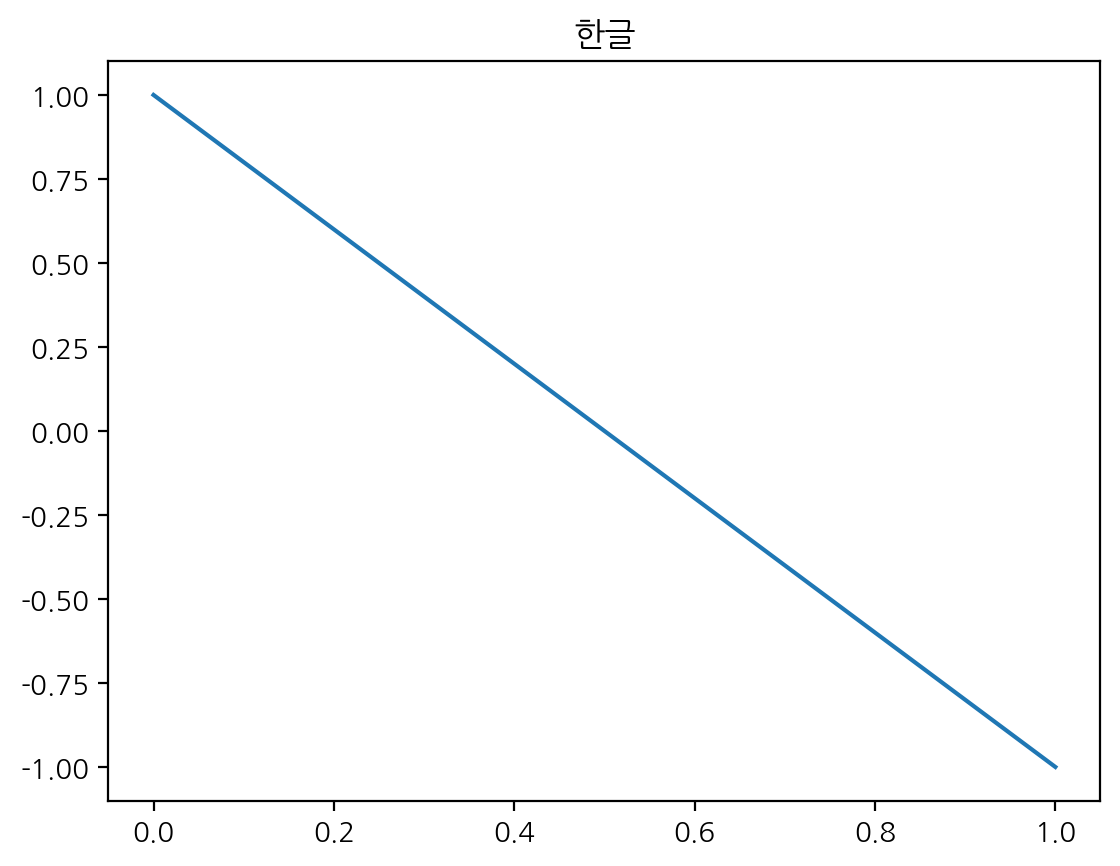

In [2]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1,-1]).plot(title="한글")

In [3]:
df = pd.read_excel("purchase_transaction.xlsx", sheet_name=1)
df.shape

(39620, 16)

In [4]:
df.head()

,id,Order_Id,User_Id,Purchase_Date,Period,Retailer,ProductCode,Item_Description,Sales_Unit,Price,Agegroup,Gender,MasterProdcutNo,MasterProdcutName,MasterCategoryFullNo,MasterCategoryFullName
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,60,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,30,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이
2,95719,fba423b18a74d4aeaf1e69356bd10bd7,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,8809486799871,바나밸리 바나나,1,3000,30,M,8809486799871,바나밸리 바나나,C001001300080001,과일->바나나 · 파인애플->바나나
3,95720,406b8f0a04b420cff9c1002ea17d1480,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,1500000033750,왕자두6입/팩,1,7000,30,M,1500000033750,왕자두6입/팩,C001001300150005,과일->포도 · 수입포도 · 복숭아 · 자두 · 살구->자두
4,95721,3d9f53a8fd04e7b8b38fac156e9eefb0,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,2500000049910,(A)당찬사과4-11입/봉,1,9000,30,M,2500000049910,당찬사과4-11입/봉,C001001300010001,과일->사과 · 배->사과


In [5]:
df.columns

Index(['id', 'Order_Id', 'User_Id', 'Purchase_Date', 'Period', 'Retailer',
       'ProductCode', 'Item_Description', 'Sales_Unit', 'Price', 'Agegroup',
       'Gender', 'MasterProdcutNo', 'MasterProdcutName',
       'MasterCategoryFullNo', 'MasterCategoryFullName'],
      dtype='object')

In [8]:
df.columns = ["구매건별ID", "주문번호", "사용자ID", "구매날짜", "구매주차", "리테일러", "상품코드", "상품명"
             ,"구매갯수", "상품개당가격", "연령대", "성별", "마스터상품번호", "마스터상품명"
              , "마스터카테고리코드", "마스터카테고리이름"]

In [10]:
df.sample(3)

,구매건별ID,주문번호,사용자ID,구매날짜,구매주차,리테일러,상품코드,상품명,구매갯수,상품개당가격,연령대,성별,마스터상품번호,마스터상품명,마스터카테고리코드,마스터카테고리이름
32441,303898,e48691f39b14fea4ab7024327954ab33,33545289e8cc4c25438521e4cb3d5bba,2020-09-03,20200136,A,0417963230007,재사용 봉투(유성구) 20L*1매,2,700,30,M,0417963230007,재사용 봉투(유성구) 20L*1매,C00000000000,Unknown
37465,314263,b51ae4f75bed389bd46b4ebf81581e81,c310a122460454b9136561b53cb94cc4,2020-10-02,20200140,C,8801033787775,베지밀 저당 두유,1,15800,30,F,8801033787775,베지밀 저당 두유,C001001700130019,생수 · 과자 · 라면 · 커피->생수 · 음료 · 두유->일반두유
38554,317070,9fe649c993b5b84588309466e33849a7,8a7cdedbb1091ac9e0d18ea3e458e76b,2020-09-29,20200140,A,2890930000007,베이커리 팩토리,1,4000,40,F,2890930000007,베이커리 팩토리,C00000000000,Unknown


In [269]:
df["구매날짜"].map(lambda x : x)

0       2019-01-18
1       2019-01-18
2       2019-09-16
3       2019-09-16
4       2019-09-16
           ...    
39615   2020-07-23
39616   2020-07-15
39617   2020-10-04
39618   2020-10-04
39619   2020-10-04
Name: 구매날짜, Length: 39619, dtype: datetime64[ns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39620 entries, 0 to 39619
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   구매건별ID     39620 non-null  int64         
 1   주문번호       39620 non-null  object        
 2   사용자ID      39620 non-null  object        
 3   구매날짜       39620 non-null  datetime64[ns]
 4   구매주차       39620 non-null  int64         
 5   리테일러       39620 non-null  object        
 6   상품코드       39620 non-null  object        
 7   상품명        39620 non-null  object        
 8   구매갯수       39620 non-null  int64         
 9   상품개당가격     39620 non-null  int64         
 10  연령대        39620 non-null  int64         
 11  성별         39619 non-null  object        
 12  마스터상품번호    39620 non-null  object        
 13  마스터상품명     39620 non-null  object        
 14  마스터카테고리코드  39620 non-null  object        
 15  마스터카테고리이름  39620 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1

In [12]:
df.isnull().sum()

구매건별ID       0
주문번호         0
사용자ID        0
구매날짜         0
구매주차         0
리테일러         0
상품코드         0
상품명          0
구매갯수         0
상품개당가격       0
연령대          0
성별           1
마스터상품번호      0
마스터상품명       0
마스터카테고리코드    0
마스터카테고리이름    0
dtype: int64

In [15]:
df = df.dropna()

In [23]:
df.shape

(39619, 16)

In [246]:
values_name = df.groupby("상품명")["금액"].sum().nlargest(30).index
values_name

Index(['새우맛을알아?한판초밥(16입)', '2[제] 깐마늘 300g', '8한성 유부초밥 320g', '0가시오이(개)',
       '1하치 생 오로시 와사비 45G', '5재사용봉투(부산북구)20L*낱장(V19)', '★삼성)QN65Q87RA-W5',
       '삼성)QN65Q87RA-W5', '★UN75RU7190F-S', '○세계견과건과10종세트', '○(S)CJ 스팸복합2호',
       '○고소한견과4종', 'LG_FQ18VAKWU2_칸', 'LG)OLED55C9FS', '○(D)정가득영광참굴비2',
       '△시바스리갈12년500', '○(D)당도선별사과', '삼성 DV14R8540KV', '○종근당 발효홍삼 스틱',
       '삼성_RT53K6035SL', '○(D)블랙앵거스LA식갈', '○(D)피코크한우냉동갈', '삼성 SM-T860NZAAKOO',
       'T55AGZZ1TU', 'LT-US65T01', '○유기농 정성가득 견과', '동원건강한2호', '○CJ 스팸8E호',
       '일렉 퓨어Q9 PQ91-3BW', 'SM-P610NZAAKOO'],
      dtype='object', name='상품명')

In [262]:
df.loc[df["상품명"].isin(values_name), ["상품명","금액", "구매갯수"]].groupby(["상품명"]).sum()

,금액,구매갯수
상품명,,
0가시오이(개),100000100,1
1하치 생 오로시 와사비 45G,100000100,1
2[제] 깐마늘 300g,100000300,1
5재사용봉투(부산북구)20L*낱장(V19),100000100,1
8한성 유부초밥 320g,100000300,1
LG)OLED55C9FS,1690000,1
LG_FQ18VAKWU2_칸,1870000,1
LT-US65T01,578000,1
SM-P610NZAAKOO,451000,1


In [239]:
df.groupby("상품명")["상품코드"].count().nlargest(55)

상품명
애호박(개)                        66
"다이소 균일가 (1,000)"             48
재사용봉투20L                      44
올리브짜파게티5입                     43
파프리카                          42
대여용부직포쇼핑백                     41
"다이소 균일가 (2,000)"             40
시그니처물티슈                       39
흙당근(100g)                     38
양파(1.8kg/망)                   35
바나밸리 프레쉬바나                    33
1등급_대란_30구                    32
신선특란30입                       32
흙대파(봉)                        32
"다이소 균일가 (3,000)"             31
Dole 스위티오바나나                  31
농심 올리브짜파게티1                   31
청양고추(봉)                       31
컷팅양배추(국산)_개                   30
100원 공병(신)                    28
(A)GAP무농약 뿌리없                 27
뿌리손질_새송이버섯_                   27
일판란 30개입 특란                   26
친환경_팽이버섯_(봉)                  26
친환경_팽이버섯_봉                    26
행복생생란(대30입)                   26
GAP팽이버섯(봉)                    25
국내산삼겹살수육용                     25
농심신라면120G*5입                  25
알찬란 30개입 대란                   25
얼큰한너구리

In [21]:
df.nunique()

구매건별ID       39619
주문번호         23351
사용자ID         1050
구매날짜           359
구매주차            57
리테일러             3
상품코드         21393
상품명          21686
구매갯수            48
상품개당가격         533
연령대              7
성별               2
마스터상품번호      19634
마스터상품명       18810
마스터카테고리코드     1054
마스터카테고리이름     1050
dtype: int64

In [25]:
df.describe()

,구매건별ID,구매주차,구매갯수,상품개당가격,연령대
count,39619.000000,3.961900e+04,39619.000000,3.961900e+04,39619.00000
mean,255252.236452,2.019920e+07,1.344532,2.692656e+04,35.18741
std,58457.711246,2.901563e+03,6.867807,1.421180e+06,7.95972
min,95717.000000,2.019010e+07,1.000000,0.000000e+00,10.00000
25%,213688.500000,2.020012e+07,1.000000,2.100000e+03,30.00000
50%,280101.000000,2.020013e+07,1.000000,4.000000e+03,30.00000
75%,298281.500000,2.020014e+07,1.000000,8.000000e+03,40.00000
max,319330.000000,2.020014e+07,693.000000,1.000014e+08,70.00000


In [31]:
df.describe(include="object")

,주문번호,사용자ID,리테일러,상품코드,상품명,성별,마스터상품번호,마스터상품명,마스터카테고리코드,마스터카테고리이름
count,39619,39619,39619,39619,39619,39619,39619,39619,39619,39619
unique,23351,1050,3,21393,21686,2,19634,18810,1054,1050
top,aaf4f365fd9aa23e3b3f622e1c2d1a30,6a4d6e0f2159c7e5a8508bf908e5ac1c,C,8801043015264,애호박(개),F,0400311300002,애호박(개),C002000000010001,주류->주류->주류
freq,47,369,19637,54,66,23832,67,99,1006,1006


In [50]:
large_order = df["주문번호"].value_counts().nlargest(1).index[0]

In [52]:
df.loc[df["주문번호"] == large_order]

,구매건별ID,주문번호,사용자ID,구매날짜,구매주차,리테일러,상품코드,상품명,구매갯수,상품개당가격,연령대,성별,마스터상품번호,마스터상품명,마스터카테고리코드,마스터카테고리이름
1410,126388,aaf4f365fd9aa23e3b3f622e1c2d1a30,318e9f30955c20a2f4c613264f3640d6,2019-12-01,20190148,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,30,F,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
2074,128928,aaf4f365fd9aa23e3b3f622e1c2d1a30,538bd11b067e45d84ba6d6146804d3c9,2019-11-25,20190148,A,8808739000108,"""다이소 균일가 (1,000)""",5,1000,30,F,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
2858,132339,aaf4f365fd9aa23e3b3f622e1c2d1a30,3646a5e6cfbdd724944024cca9e8b9e2,2019-12-25,20190152,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,40,F,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
2871,132510,aaf4f365fd9aa23e3b3f622e1c2d1a30,22aca1bdf92346d1fbd589fd72622957,2019-12-29,20190152,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,40,M,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
3308,140180,aaf4f365fd9aa23e3b3f622e1c2d1a30,d5e3e9987e69aa066e11feda211ff804,2020-01-01,20200101,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,20,M,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
3636,146359,aaf4f365fd9aa23e3b3f622e1c2d1a30,b2289a6d8446384840cadc5b412f032f,2019-12-21,20190151,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,40,F,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
3848,149443,aaf4f365fd9aa23e3b3f622e1c2d1a30,6673308675a4aeb16101c8a2c831c7b7,2020-01-10,20200102,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,30,F,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
3888,150639,aaf4f365fd9aa23e3b3f622e1c2d1a30,7fc3b8727dc30f345cfc6566641025d1,2019-12-25,20190152,A,8808739000108,"""다이소 균일가 (1,000)""",2,1000,30,M,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
4329,158216,aaf4f365fd9aa23e3b3f622e1c2d1a30,9934f1f33ae3ada3cea2cdba41a32d90,2020-01-13,20200103,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,40,M,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown
5003,168570,aaf4f365fd9aa23e3b3f622e1c2d1a30,fe772d8c233470eff492d06722e201d5,2020-02-17,20200108,A,8808739000108,"""다이소 균일가 (1,000)""",1,1000,30,F,8808739000108,"다이소 균일가 (1,000)",C00000000000,Unknown


In [186]:
df["사용자ID"].value_counts().nlargest(10)

6a4d6e0f2159c7e5a8508bf908e5ac1c    369
38670840240953aa0db975f49f7fed72    275
3646a5e6cfbdd724944024cca9e8b9e2    219
1791caa7f5d0450ae6a162b26c32f1ba    218
0c2238bd9aa559bc59225d5c0dbaa412    215
7fc3b8727dc30f345cfc6566641025d1    208
282271ab833c0d7e91a01c947c3ca1e3    205
9402d2837028ee52c28bce7482474d50    203
5bfceb3770771b23402c45406bd2e281    187
e2d0e8b114184e71f232f3c695833f7d    181
Name: 사용자ID, dtype: int64

In [189]:
large_user = df["사용자ID"].value_counts().nlargest(1).index[0]
large_user

'6a4d6e0f2159c7e5a8508bf908e5ac1c'

In [69]:
df.loc[df["사용자ID"] == large_user, ["구매날짜", "상품명", "구매갯수", "상품개당가격", "연령대", "성별"]]

,구매날짜,상품명,구매갯수,상품개당가격,연령대,성별
393,2019-12-19,롯데로스팜200g*3,1,5000,30,M
394,2019-12-19,푸르밀 비타요구 킹 9,1,1000,30,M
395,2019-12-19,스위티썬 바나나,1,3400,30,M
396,2019-12-19,모눈체크거실화 270mm,1,3900,30,M
397,2019-12-19,어메이징 어묵탕,1,9000,30,M
...,...,...,...,...,...,...
37679,2020-10-02,5900콤비네이션,1,5900,30,M
37680,2020-10-02,참광우연회(특대),1,14900,30,M
37681,2020-10-02,피코크 트루워터 2L X,1,2800,30,M
38398,2020-10-03,햇반 매일잡곡밥 8입,1,10000,30,M


In [190]:
df.loc[df["사용자ID"] == large_user, "구매날짜"].value_counts().nlargest(12)

2019-11-30    32
2020-09-12    27
2020-08-02    26
2019-10-12    24
2019-12-19    24
2020-07-17    22
2019-11-14    21
2019-11-03    20
2020-06-27    20
2020-07-05    17
2019-10-05    15
2020-08-13    15
Name: 구매날짜, dtype: int64

In [105]:
large_user_date = df.loc[df["사용자ID"] == large_user, "구매날짜"].value_counts().nlargest(12).index
large_user_date

DatetimeIndex(['2019-11-30', '2020-09-12', '2020-08-02', '2019-10-12',
               '2019-12-19', '2020-07-17', '2019-11-14', '2019-11-03',
               '2020-06-27', '2020-07-05', '2019-10-05', '2020-08-13'],
              dtype='datetime64[ns]', freq=None)

In [95]:
df.loc[(df["사용자ID"] == large_user) & (df["구매날짜"].isin(large_user_date)), ["구매날짜", "상품명", "구매갯수", "상품개당가격","금액","마스터상품명","리테일러", "연령대", "성별"]]

,구매날짜,상품명,구매갯수,상품개당가격,금액,마스터상품명,리테일러,연령대,성별
434,2019-11-30,(대)국내산칼집삼겹살,1,12100,12100,(대)국내산칼집삼겹살,C,30,M
435,2019-11-30,핸드립 케냐 바링고,1,5900,5900,핸드립 케냐 바링고,C,30,M
436,2019-11-30,가득담은김자반 120g,1,5000,5000,가득담은김자반 120g,C,30,M
437,2019-11-30,피콕분식 마늘떡볶이,1,3500,3500,피콕분식 마늘떡볶이,C,30,M
438,2019-11-30,노브랜드 향락스2L,1,2300,2300,노브랜드 향락스2L,C,30,M
439,2019-11-30,힘찬하루 헛개차 1.5L,1,2000,2000,광동 힘찬하루헛개차(1.5L),C,30,M
440,2019-11-30,크리넥스여행용70*3,1,2100,2100,카카오프렌즈 여행용 티슈(70매*3입),C,30,M
441,2019-11-30,꼬북칩 콘스프 160g,1,2000,2000,오리온 꼬북칩 콘스프맛(160G),C,30,M
442,2019-11-30,(대)국내산칼집삼겹살,1,11600,11600,(대)국내산칼집삼겹살,C,30,M
443,2019-11-30,레트로 3겹 키친타올,1,4900,4900,레트로 3겹 키친타올,C,30,M


In [94]:
# "구매갯수", "상품개당가격"
df["금액"] = df["구매갯수"] * df["상품개당가격"]
df["금액"]

0        12400
1        12400
2         3000
3         7000
4         9000
         ...  
39615    17000
39616    22300
39617     7000
39618     5000
39619     7900
Name: 금액, Length: 39619, dtype: int64

In [106]:
df.loc[(df["사용자ID"] == large_user) & (df["구매날짜"].isin(large_user_date)), ["구매날짜", "금액"]].groupby(["구매날짜"]).agg(["count", "sum", "mean"])

금액                      
           count     sum          mean
구매날짜                                  
2019-10-05    15  128300   8553.333333
2019-10-12    24  151700   6320.833333
2019-11-03    20  115000   5750.000000
2019-11-14    21  111000   5285.714286
2019-11-30    32  240000   7500.000000
2019-12-19    24  113000   4708.333333
2020-06-27    20  133600   6680.000000
2020-07-05    17   91700   5394.117647
2020-07-17    22  217600   9890.909091
2020-08-02    26  206500   7942.307692
2020-08-13    15   76300   5086.666667
2020-09-12    27  351400  13014.814815

In [191]:
df["금액"].sort_values().nlargest(30)

38709    100001400
3521     100001300
3703     100001300
3646     100000300
3650     100000300
3704     100000100
3648     100000100
3647     100000100
21401      3446000
21398      3446000
2116       2800000
11757      2297700
11764      2002000
11759      1957200
20750      1870000
18824      1690000
11777      1449000
32625      1405000
11778      1313400
17576      1100000
32338       837000
2117        795000
11775       740000
11772       700000
20253       649000
804         598000
13625       578000
11758       547800
32578       530400
11755       513500
Name: 금액, dtype: int64

In [193]:
large_price = df["금액"].sort_values().nlargest(30).values
large_price_index = df["금액"].sort_values().nlargest(30).index
large_price_index

Int64Index([38709,  3521,  3703,  3646,  3650,  3704,  3648,  3647, 21401,
            21398,  2116, 11757, 11764, 11759, 20750, 18824, 11777, 32625,
            11778, 17576, 32338,  2117, 11775, 11772, 20253,   804, 13625,
            11758, 32578, 11755],
           dtype='int64')

In [273]:
df["금액"].sort_values().nlargest(30)

21398    3446000
21401    3446000
2116     2800000
11757    2297700
11764    2002000
11759    1957200
20750    1870000
18824    1690000
11777    1449000
32625    1405000
11778    1313400
17576    1100000
32338     837000
2117      795000
11775     740000
11772     700000
20253     649000
804       598000
13625     578000
11758     547800
32578     530400
11755     513500
1268      499000
26573     451000
2852      405000
7010      399000
28052     396000
2717      378000
33823     367200
1893      360000
Name: 금액, dtype: int64

In [270]:
df.loc[df["금액"] > 10000000]

Int64Index([3521, 3646, 3647, 3648, 3650, 3703, 3704, 38709], dtype='int64')

In [272]:
df = df.drop(df.loc[df["금액"] > 10000000].index)

In [184]:
df.loc[df["금액"] > 10000000][["사용자ID", "구매날짜", "상품명",  "금액", "구매갯수", "상품개당가격", "연령대", "성별"]]

,사용자ID,구매날짜,상품명,금액,구매갯수,상품개당가격,연령대,성별
3521,db271f725386ab9100660cfa5f7d182f,2019-12-13,새우맛을알아?한판초밥(16입),100001300,1,100001300,50,F
3646,b2289a6d8446384840cadc5b412f032f,2019-12-12,8한성 유부초밥 320g,100000300,1,100000300,40,F
3647,b2289a6d8446384840cadc5b412f032f,2019-12-12,1하치 생 오로시 와사비 45G,100000100,1,100000100,40,F
3648,b2289a6d8446384840cadc5b412f032f,2019-12-12,0가시오이(개),100000100,1,100000100,40,F
3650,b2289a6d8446384840cadc5b412f032f,2019-12-12,2[제] 깐마늘 300g,100000300,1,100000300,40,F
3703,b2289a6d8446384840cadc5b412f032f,2020-01-08,새우맛을알아?한판초밥(16입),100001300,1,100001300,40,F
3704,b2289a6d8446384840cadc5b412f032f,2020-01-08,5재사용봉투(부산북구)20L*낱장(V19),100000100,1,100000100,40,F
38709,ebafa77abbc29be90a2c7e2b20cedf1d,2020-10-03,새우맛을알아?한판초밥(16입),100001400,1,100001400,30,M


In [230]:
df.loc[(df["금액"] > 300000) & (df["연령대"] == 40) &  (df["금액"] < 100000000)][["구매날짜", "상품명",  "금액", "구매갯수", "상품개당가격", "연령대", "성별"]]

,구매날짜,상품명,금액,구매갯수,상품개당가격,연령대,성별
1893,2019-12-05,울트라USB3.0 64GB,360000,30,12000,40,F
2717,2019-12-15,쿠쿠 10인용 IH CRP-H,378000,1,378000,40,M
2852,2019-12-27,온더바디 더 내추럴 비누(코코넛),405000,45,9000,40,F
7010,2020-04-11,핸)스톰북14오피스,399000,1,399000,40,M
13625,2020-08-29,LT-US65T01,578000,1,578000,40,M
14285,2020-07-17,스위치 본체:HAD 모여,360000,1,360000,40,F
20253,2020-09-05,삼성 SM-T860NZAAKOO,649000,1,649000,40,F
21398,2020-07-20,★삼성)QN65Q87RA-W5,3446000,1,3446000,40,F
21401,2020-07-19,삼성)QN65Q87RA-W5,3446000,1,3446000,40,F
24507,2020-09-22,오로라식탁(의자2/벤,335200,1,335200,40,M


<AxesSubplot:xlabel='연령대'>

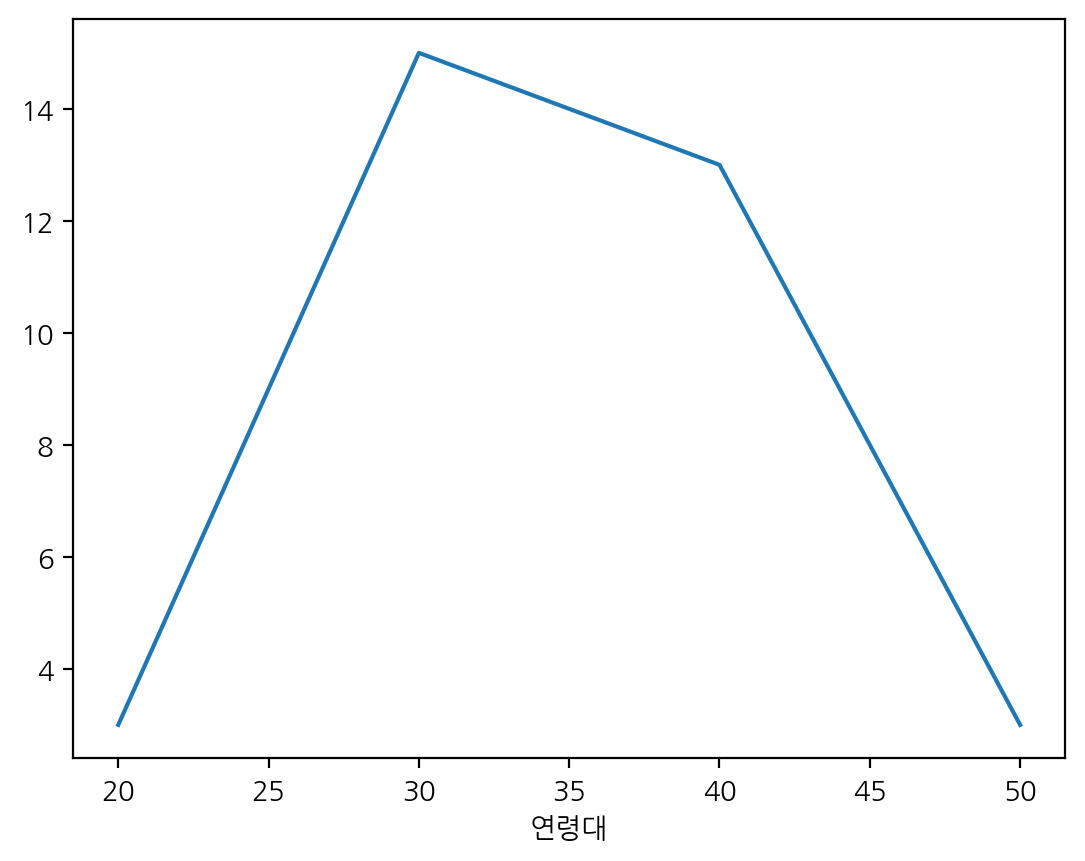

In [215]:
df.loc[(df["금액"] > 300000) & (df["금액"] < 100000000)][["구매날짜", "상품명",  "금액", "구매갯수", "상품개당가격", "연령대", "성별"]].groupby("연령대")["금액"].count().plot()

<AxesSubplot:xlabel='연령대'>

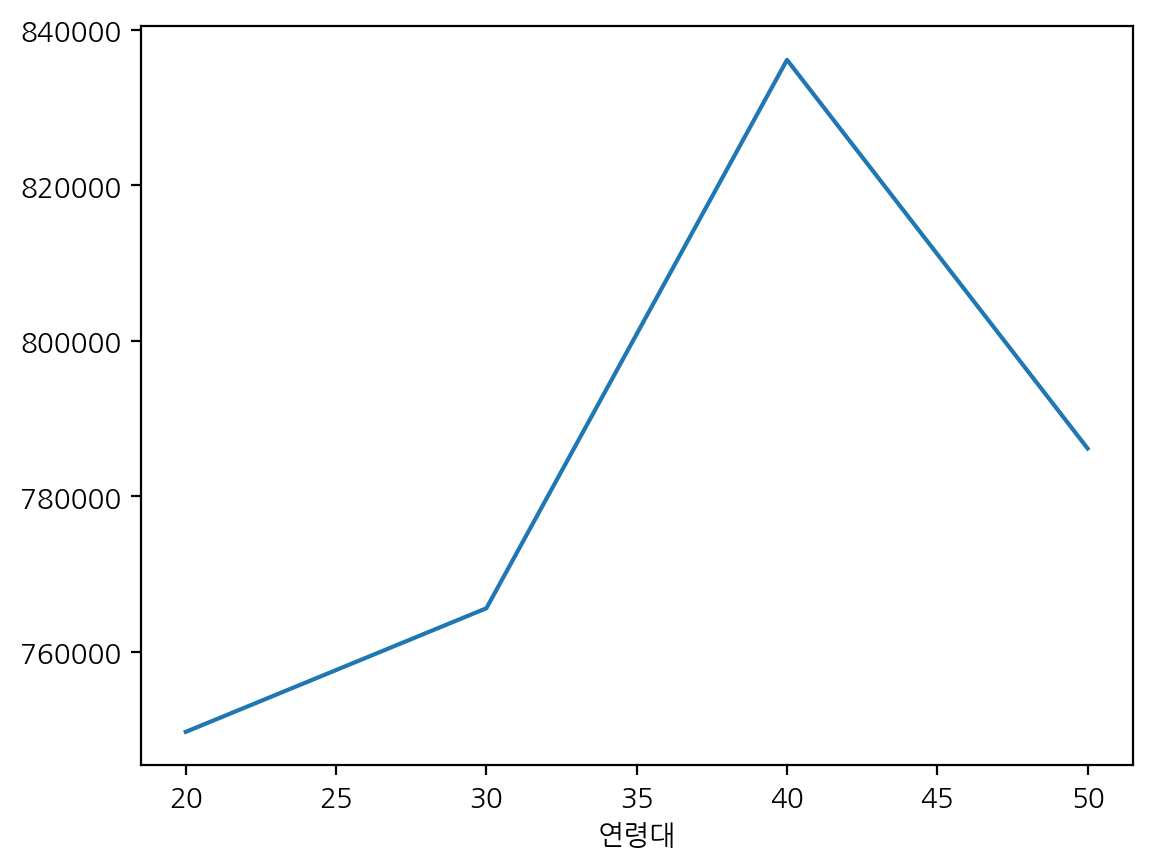

In [217]:
df.loc[(df["금액"] > 200000) & (df["금액"] < 100000000)][["구매날짜", "상품명",  "금액", "구매갯수", "상품개당가격", "연령대", "성별"]].groupby("연령대")["금액"].mean().plot()

In [231]:
df.loc[df["구매갯수"]>10].groupby("사용자ID")["상품명"].count().nlargest(10)

사용자ID
a6d6414bb19260c7ed134377306e5cea    7
2a96b6c12a62da2f8ae4c119e3a66724    4
38670840240953aa0db975f49f7fed72    3
6fb8ba13bf8e87d0f247a44a497fa720    3
86375b34e5adf4ea0e5d79448f77714e    3
c635e4cabeeddb92ec3dd2d0a49e4036    3
3646a5e6cfbdd724944024cca9e8b9e2    2
3b0aff53cfcc88fad9d4d4dbd3f91b49    2
6079d2b4b5095c7e8dd44a2d1018be28    2
73849f3b0fd1b00430152a621547b82c    2
Name: 상품명, dtype: int64

In [162]:
다수구매2 = df.loc[df["구매갯수"]>10].groupby("사용자ID")["상품명"].count().nlargest(10).index
다수구매2

Index(['a6d6414bb19260c7ed134377306e5cea', '2a96b6c12a62da2f8ae4c119e3a66724',
       '38670840240953aa0db975f49f7fed72', '6fb8ba13bf8e87d0f247a44a497fa720',
       '86375b34e5adf4ea0e5d79448f77714e', 'c635e4cabeeddb92ec3dd2d0a49e4036',
       '3646a5e6cfbdd724944024cca9e8b9e2', '3b0aff53cfcc88fad9d4d4dbd3f91b49',
       '6079d2b4b5095c7e8dd44a2d1018be28', '73849f3b0fd1b00430152a621547b82c'],
      dtype='object', name='사용자ID')

In [234]:
df.loc[(df["사용자ID"] == "a6d6414bb19260c7ed134377306e5cea") & (df["구매갯수"]>10),["구매날짜", "상품명",  "금액", "구매갯수"
                            , "상품개당가격", "연령대", "성별", "리테일러"
                            , "마스터상품명", "마스터카테고리이름"]].sort_index()

,구매날짜,상품명,금액,구매갯수,상품개당가격,연령대,성별,리테일러,마스터상품명,마스터카테고리이름
11755,2020-09-03,○CJ 스팸8E호,513500,13,39500,30,M,C,○CJ 스팸8E호,생수 · 과자 · 라면 · 커피->통조림->스팸 · 햄 통조림
11756,2020-09-03,○특선인삼1호,88000,1,88000,30,M,C,○특선인삼1호,홍삼 · 면역->홍삼->홍삼
11757,2020-09-03,○세계견과건과10종세트,2297700,23,99900,30,M,C,○세계견과건과10종세트,견과 · 선식 · 차류->견과류 · 건과->건과세트
11758,2020-09-03,○유기농 정성가득 견과,547800,11,49800,30,M,C,○유기농 정성가득 견과,견과 · 선식 · 차류->견과류 · 건과->믹스너트 · 하루견과 · 시즈닝견과
11759,2020-09-03,○고소한견과4종,1957200,28,69900,30,M,C,고소한견과4종,견과 · 선식 · 차류->견과류 · 건과->믹스너트 · 하루견과 · 시즈닝견과
...,...,...,...,...,...,...,...,...,...,...
36067,2020-09-30,크린롤백 2입 기획,4400,1,4400,30,M,C,크린롤백 2입 기획,주방 · 청소 · 욕실용품->일회용품 · 소모품->비닐백
36068,2020-09-30,서울 짜요짜요 포도맛,2000,1,2000,30,M,C,서울 짜요짜요 (포도)(40G*6입),우유 · 냉장냉동 · 간편식->우유 · 요구르트->떠먹는 요구르트
36069,2020-09-30,한방족발,13900,1,13900,30,M,C,한방족발,정육 · 계란->양념육 · 가공육->양념 · 가공육 업체직송관
36070,2020-09-30,20N린넨욕실화_다크그,15800,2,7900,30,M,C,20N린넨욕실화_다크그,주방 · 청소 · 욕실용품->욕실용품->욕실화


In [138]:
large_count_index = df["구매갯수"].sort_values().nlargest(30).index
large_count_index

Int64Index([ 1411, 31184,  4589, 10357, 16213,  4205, 20321, 20488, 12703,
             4660, 29945, 23903, 16216, 18909, 35027, 37945, 17464,  4143,
            11764, 32625,  3619,  2852, 30550,  2737, 10366, 11778,  2156,
            31507,  5595,  3166],
           dtype='int64')

In [142]:
df.iloc[large_count_index][["구매날짜", "상품명",  "금액", "구매갯수"
                            , "상품개당가격", "연령대", "성별", "리테일러"
                            , "마스터상품명", "마스터카테고리이름"]]

,구매날짜,상품명,금액,구매갯수,상품개당가격,연령대,성별,리테일러,마스터상품명,마스터카테고리이름
1411,2019-12-01,네이처리퍼블릭10,0,693,0,30,F,A,네이처리퍼블릭10,Unknown
31185,2020-07-29,K로고 플레이 캐쥬얼,3000,1,3000,30,F,C,K로고 플레이 캐쥬얼,주방 · 청소 · 욕실용품->밀폐 · 보관용기->물병
4590,2020-02-08,아이배냇 꼬마 맛있는 밥소스 쇠고기간장,15800,2,7900,30,F,A,꼬마 밥소스(쇠고기간장)(150G),생수 · 과자 · 라면 · 커피->분유 · 유아식->이유식
10358,2020-06-12,스트레치셋업슬랙스NA,39900,1,39900,40,F,C,스트레치셋업슬랙스NA,성인 · 아동의류->남성의류->남성바지
16214,2020-07-26,2080 오리지날 칫솔 (미세모),23800,2,11900,30,F,A,2080 오리지날 칫솔 (미세모)(10입),구강케어->칫솔->일반 칫솔
4205,2020-01-22,알퐁소 의류용품(100),23900,239,100,40,M,A,알퐁소 의류용품(100),Unknown
20322,2020-07-18,애견용품10,0,5,0,30,M,A,애견용품10,반려동물용품->애견식품->애견일반사료
20489,2020-09-04,Only Price 1등급우유 930ml,1700,1,1700,30,F,A,Only Price 1등급 우유(930ML*2입),우유 · 냉장냉동 · 간편식->우유 · 요구르트->흰우유
12704,2020-07-18,한끼밥상 새송이,1600,1,1600,30,F,A,한끼밥상 새송이,채소->냉동채소->간편채소
4661,2020-02-29,신)진로이즈백(병/360),2200,2,1100,30,M,A,진로G16.9%360*20 (360*20),주류->주류->주류


array([[<AxesSubplot:title={'center':'구매건별ID'}>,
        <AxesSubplot:title={'center':'구매날짜'}>,
        <AxesSubplot:title={'center':'구매주차'}>],
       [<AxesSubplot:title={'center':'구매갯수'}>,
        <AxesSubplot:title={'center':'상품개당가격'}>,
        <AxesSubplot:title={'center':'연령대'}>],
       [<AxesSubplot:title={'center':'금액'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

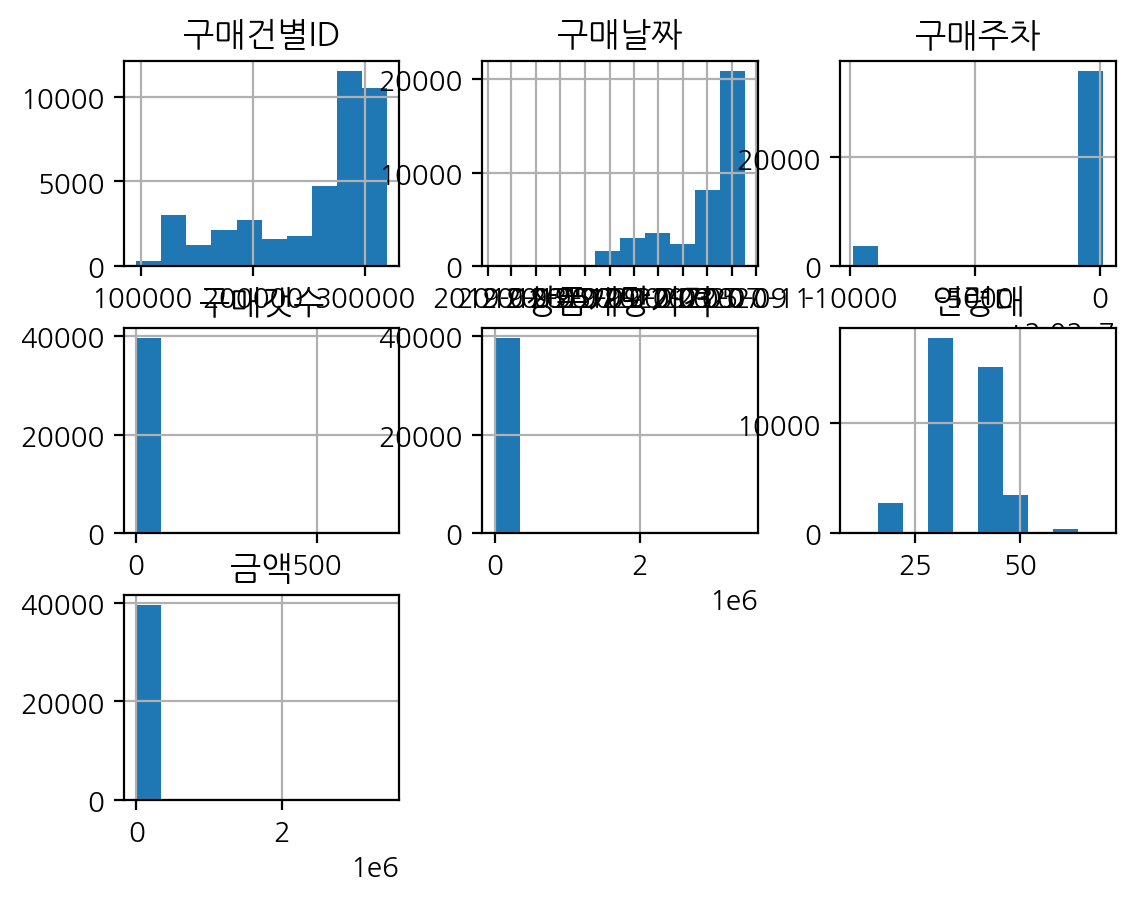

In [279]:
df.hist()

<AxesSubplot:title={'center':'연령대별 평균 소비 금액'}, xlabel='연령대', ylabel='금액'>

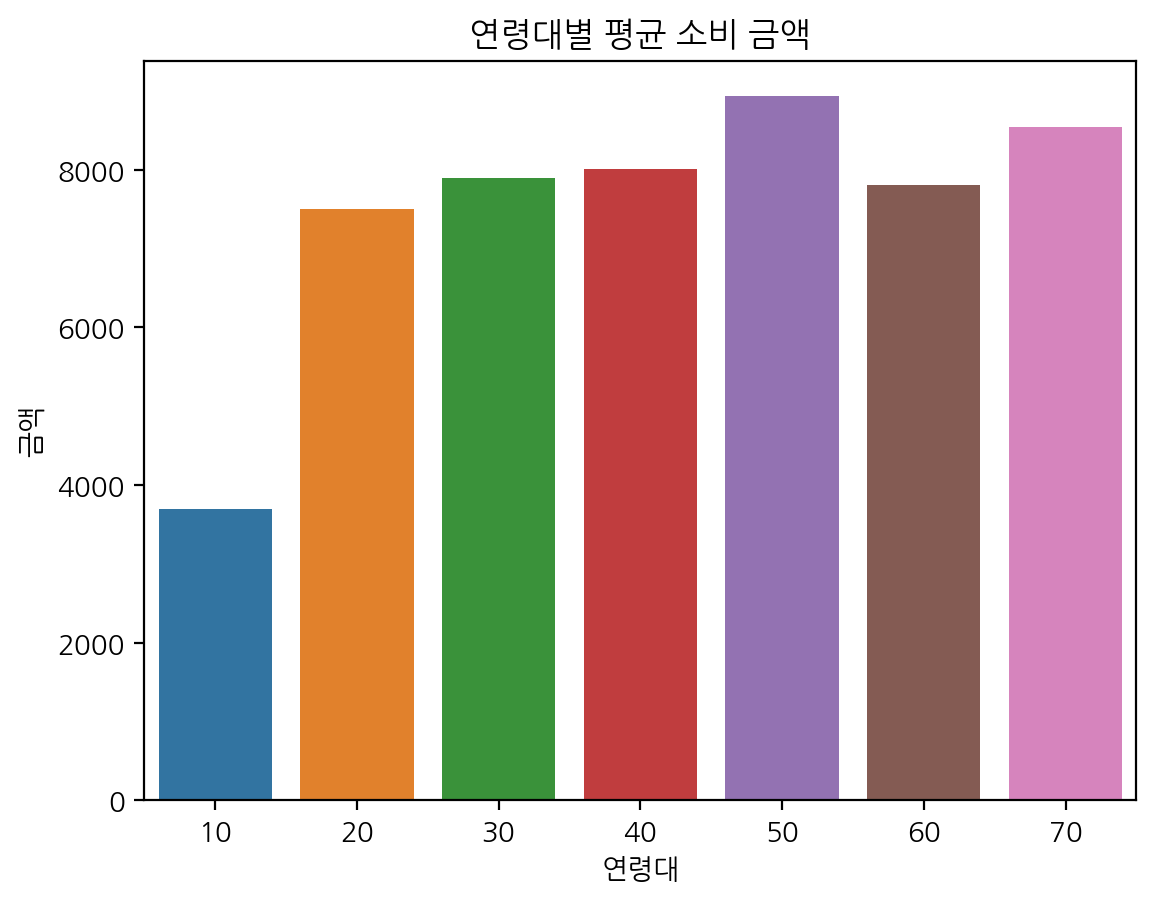

In [274]:
plt.title("연령대별 평균 소비 금액")
sns.barplot(data=df, x="연령대", y="금액", ci=None)

<AxesSubplot:xlabel='연령대', ylabel='금액'>

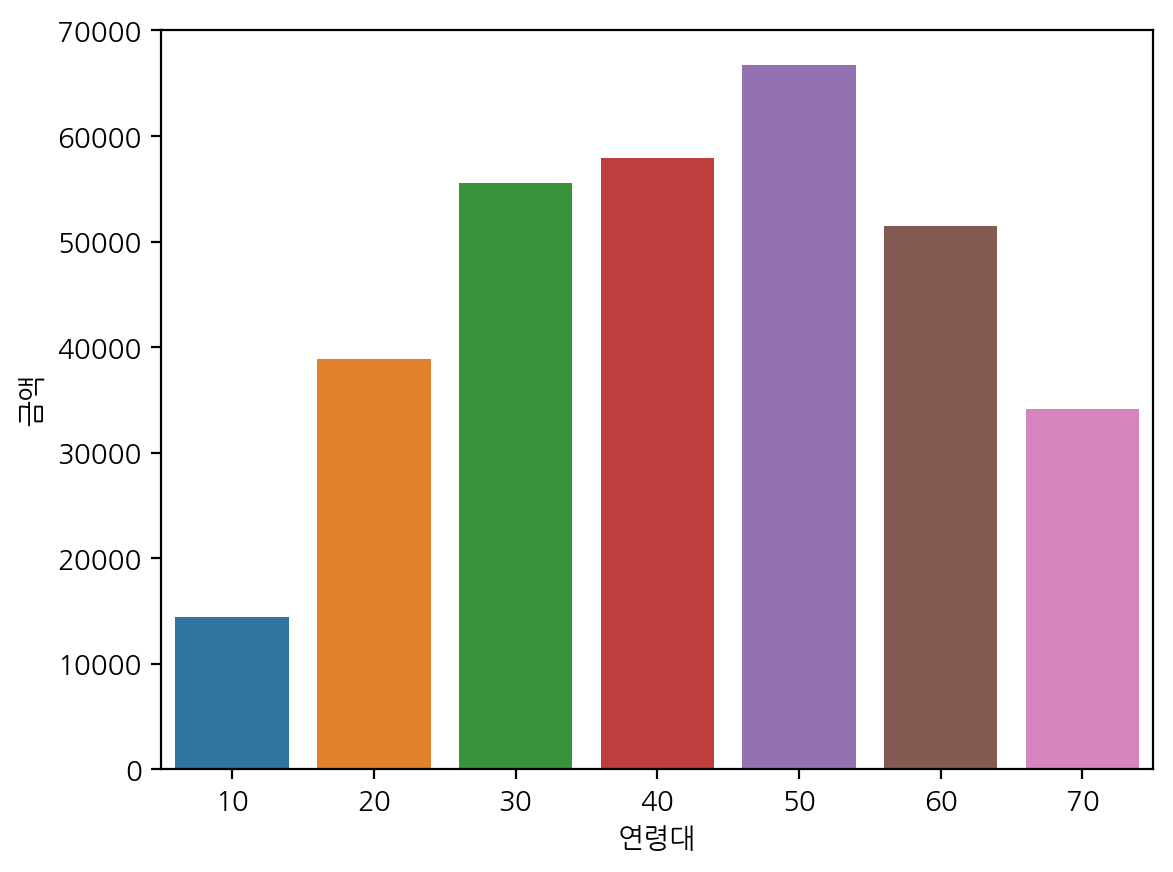

In [337]:
sns.barplot(data=df_user, x="연령대", y="금액", ci=None)

<AxesSubplot:title={'center':'연령대 총 소비 금액'}, xlabel='연령대', ylabel='금액'>

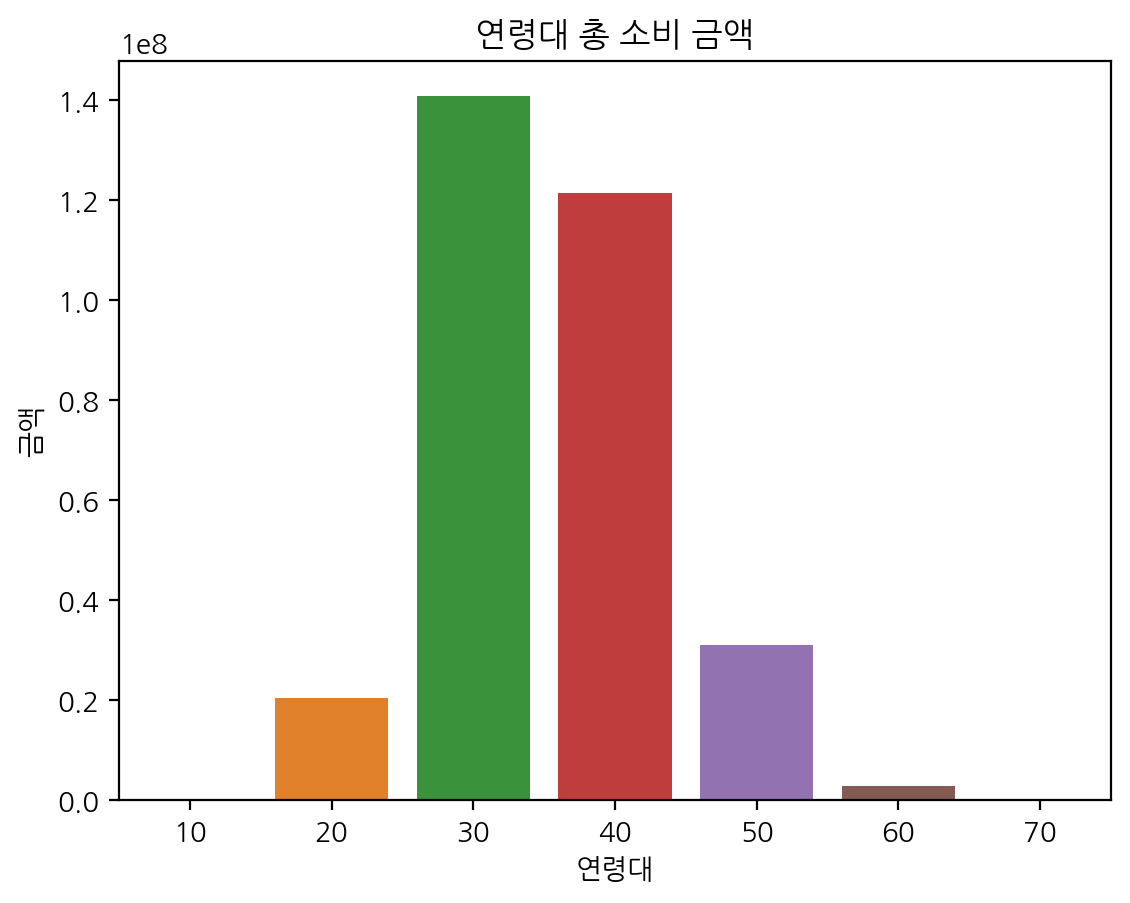

In [276]:
plt.title("연령대 총 소비 금액")
sns.barplot(data=df, x="연령대", y="금액", ci=None, estimator=sum)

<AxesSubplot:xlabel='연령대', ylabel='count'>

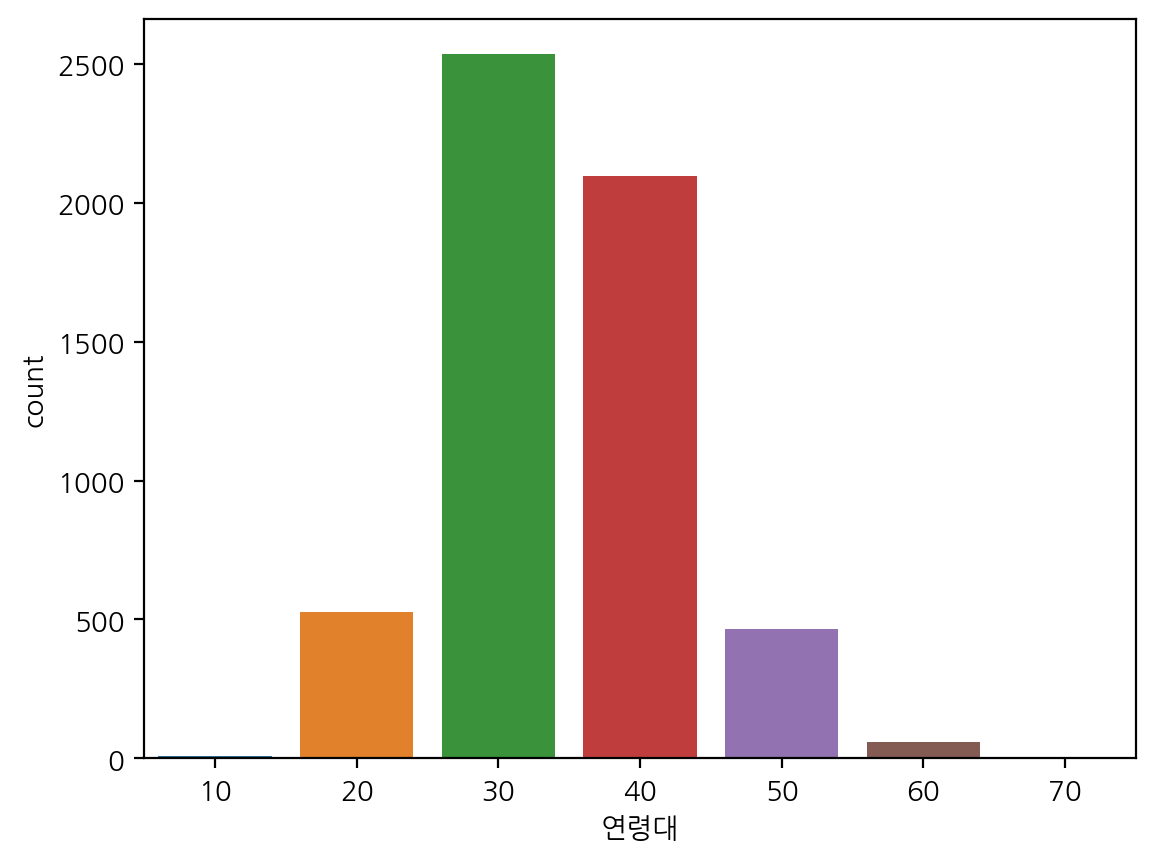

In [339]:
sns.countplot(data=df_user, x="연령대")

<AxesSubplot:xlabel='연령대', ylabel='count'>

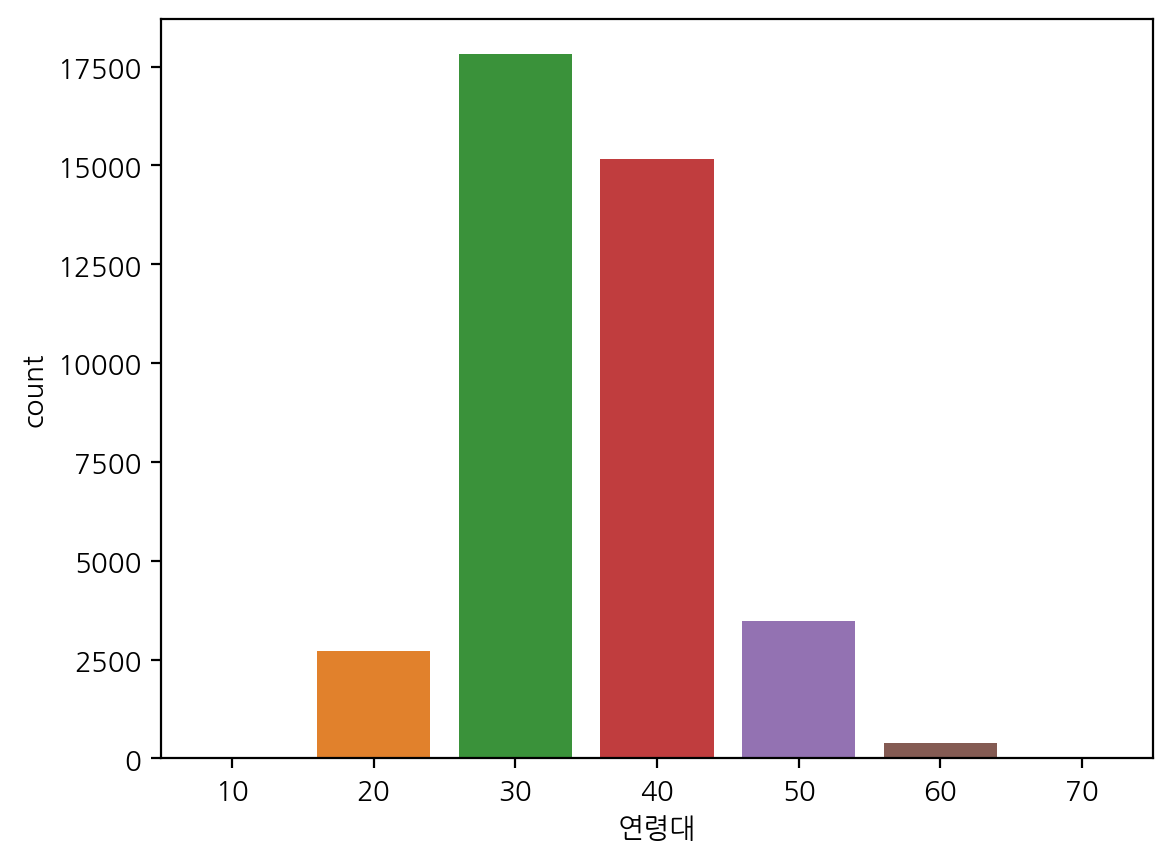

In [277]:
sns.countplot(data=df, x="연령대")

In [317]:
q3 = df["금액"].quantile(0.75)
q1 = df["금액"].quantile(0.25)
iqr = q3-q1
upper = q3 + iqr*1.5
upper
df_clean = df.loc[df["금액"] <= upper]
df_clean.shape

(36917, 18)

<AxesSubplot:xlabel='연령대', ylabel='금액'>

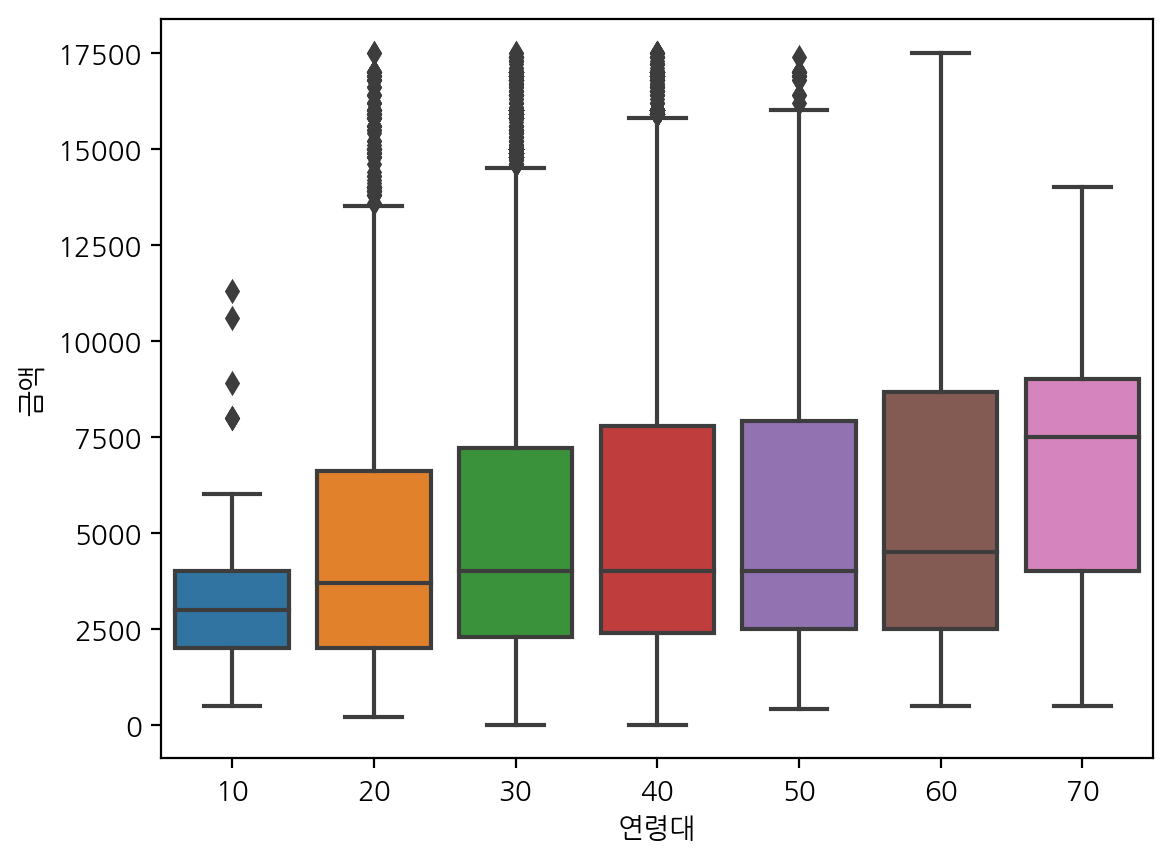

In [318]:
sns.boxplot(data=df_clean, x="연령대", y="금액")

In [280]:
df.columns

Index(['구매건별ID', '주문번호', '사용자ID', '구매날짜', '구매주차', '리테일러', '상품코드', '상품명',
       '구매갯수', '상품개당가격', '연령대', '성별', '마스터상품번호', '마스터상품명', '마스터카테고리코드',
       '마스터카테고리이름', '금액'],
      dtype='object')

In [470]:
user_age_df = df[["사용자ID", "연령대", "구매연월"]]
user_age_df

,사용자ID,연령대,구매연월
0,d41d8cd98f00b204e9800998ecf8427e,60,2019-01
1,981ac26310e4d1ab74ae250b71fb1bbe,30,2019-01
2,981ac26310e4d1ab74ae250b71fb1bbe,30,2019-09
3,981ac26310e4d1ab74ae250b71fb1bbe,30,2019-09
4,981ac26310e4d1ab74ae250b71fb1bbe,30,2019-09
...,...,...,...
39615,63e631e9cf335fce6b548b845fe0cea7,40,2020-07
39616,63e631e9cf335fce6b548b845fe0cea7,40,2020-07
39617,d15d1e2a1a19a48c63809b2b0384110c,30,2020-10
39618,d15d1e2a1a19a48c63809b2b0384110c,30,2020-10


In [471]:
user_age_df = user_age_df.drop_duplicates()
user_age_df

,사용자ID,연령대,구매연월
0,d41d8cd98f00b204e9800998ecf8427e,60,2019-01
1,981ac26310e4d1ab74ae250b71fb1bbe,30,2019-01
2,981ac26310e4d1ab74ae250b71fb1bbe,30,2019-09
17,728697a4d5b8720c6793dd41b84858ba,30,2019-11
21,728697a4d5b8720c6793dd41b84858ba,30,2019-09
...,...,...,...
39561,26fd95f37a53443ad85220d0e8fc7d3e,50,2020-09
39582,63e631e9cf335fce6b548b845fe0cea7,40,2020-08
39594,4f5fe9d41adabc2e193088c8ac032b2b,30,2020-10
39610,63e631e9cf335fce6b548b845fe0cea7,40,2020-07


In [334]:
df_user.nunique()

사용자ID    1050
금액       1507
구매갯수       85
연령대         7
dtype: int64

In [332]:
df_user.shape

(5694, 4)

In [472]:
df_user = user_price_df.merge(user_age_df, on="사용자ID")
df_user

,사용자ID,금액,구매갯수,연령대,구매연월
0,00799ddfe6d577b52e067311fa164ebc,62300,10,30,2020-09
1,00d1a7e9580ce1c872d47fa95af2e0a5,14000,2,40,2020-06
2,00d1a7e9580ce1c872d47fa95af2e0a5,14000,2,40,2020-10
3,00d1a7e9580ce1c872d47fa95af2e0a5,122900,9,40,2020-06
4,00d1a7e9580ce1c872d47fa95af2e0a5,122900,9,40,2020-10
...,...,...,...,...,...
17062,ffea3d5590079ff8a15661082e62d393,53700,12,30,2019-11
17063,ffea3d5590079ff8a15661082e62d393,54100,17,30,2019-12
17064,ffea3d5590079ff8a15661082e62d393,54100,17,30,2019-11
17065,ffea3d5590079ff8a15661082e62d393,84800,1,30,2019-12


<AxesSubplot:xlabel='연령대', ylabel='금액'>

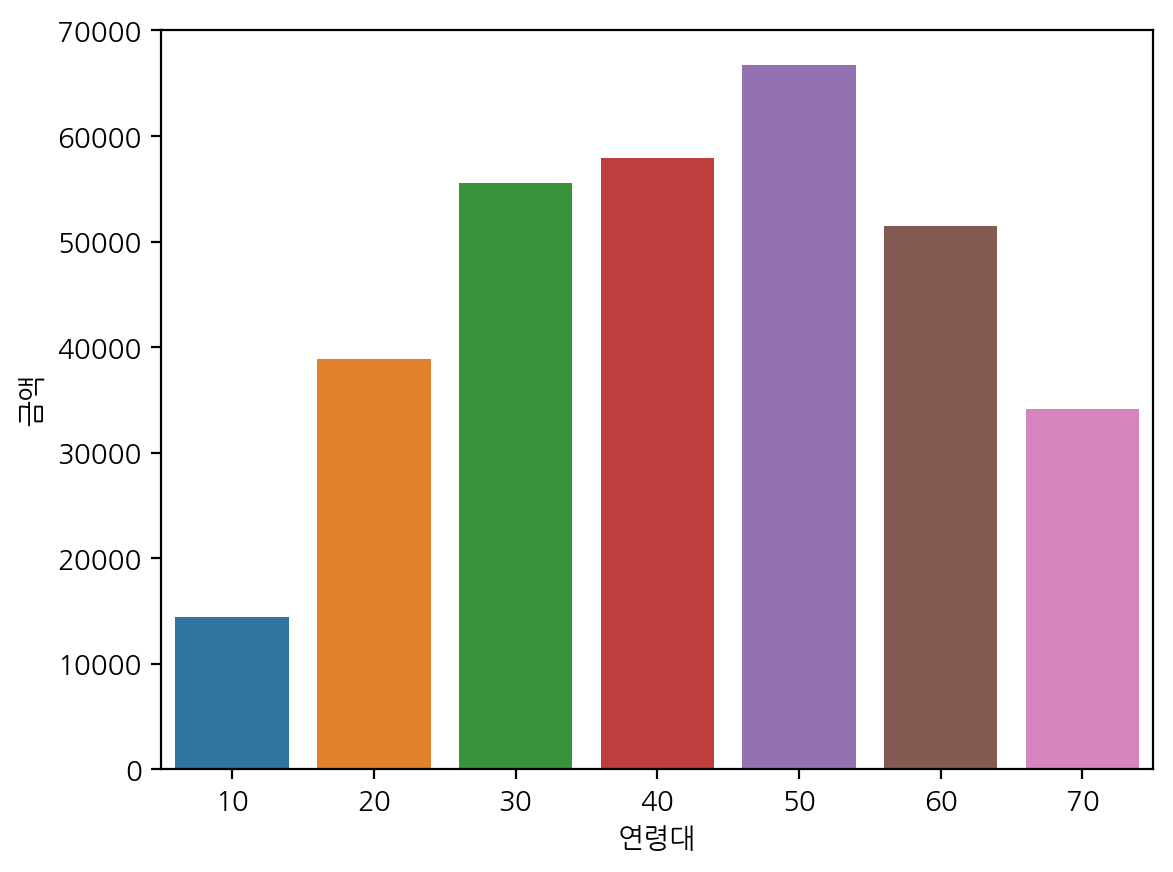

In [335]:
sns.barplot(data=df_user, x="연령대", y="금액", ci=None)

<AxesSubplot:xlabel='연령대', ylabel='count'>

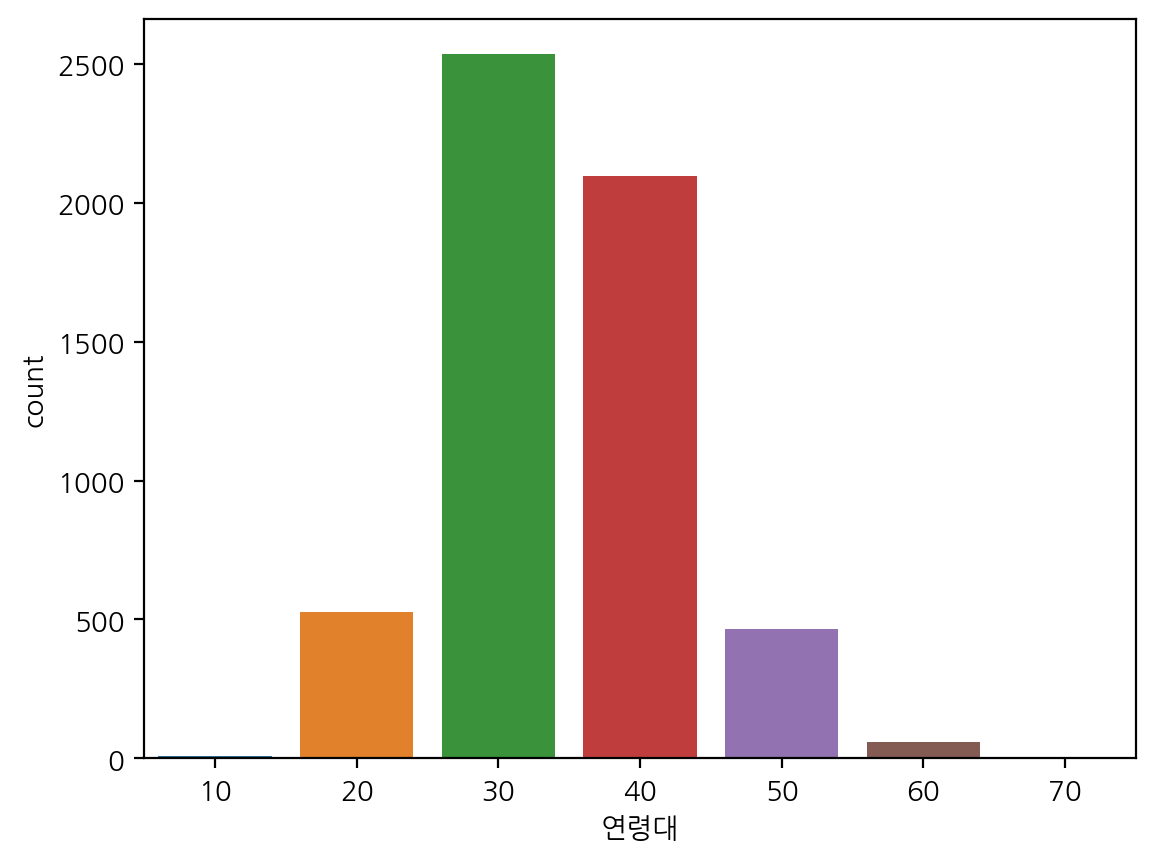

In [338]:
sns.countplot(data=df_user, x="연령대")

<AxesSubplot:xlabel='연령대', ylabel='구매갯수'>

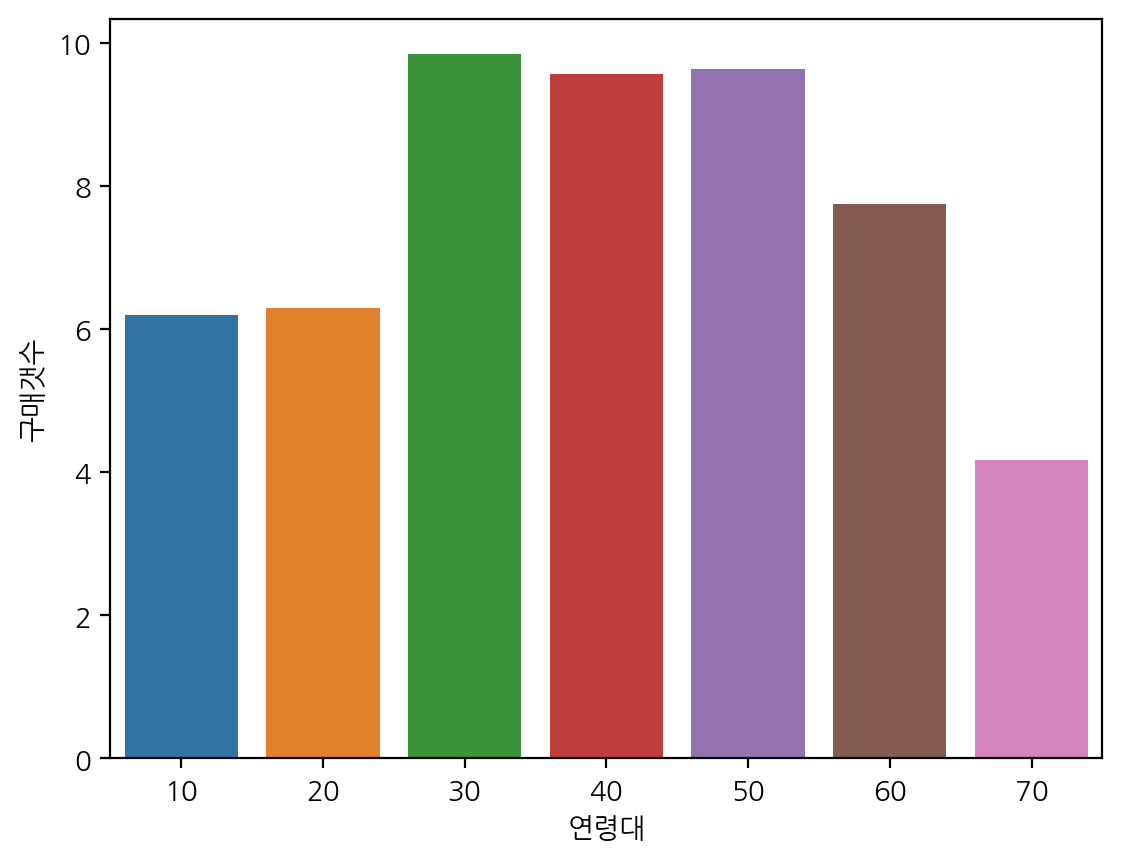

In [336]:
sns.barplot(data=df_user, x="연령대", y="구매갯수", ci=None)

In [329]:
user_price_df = df.groupby(["사용자ID", "구매날짜"])[["금액", "구매갯수"]].sum()
user_price_df

금액  구매갯수
사용자ID                            구매날짜                    
00799ddfe6d577b52e067311fa164ebc 2020-09-12   62300    10
00d1a7e9580ce1c872d47fa95af2e0a5 2020-06-26   14000     2
                                 2020-10-04  122900     9
01496bb145f6bc1c1a721e09024151d3 2020-07-28   58100    10
                                 2020-08-12   36400    13
...                                             ...   ...
ffa1e9447f222e3a0ffa3b7a08d846d4 2020-07-17   89800     1
                                 2020-09-11  102300    12
ffea3d5590079ff8a15661082e62d393 2019-11-30   53700    12
                                 2019-12-07   54100    17
                                 2019-12-25   84800     1

[5694 rows x 2 columns]

In [282]:
df.dtypes

구매건별ID                int64
주문번호                 object
사용자ID                object
구매날짜         datetime64[ns]
구매주차                  int64
리테일러                 object
상품코드                 object
상품명                  object
구매갯수                  int64
상품개당가격                int64
연령대                   int64
성별                   object
마스터상품번호              object
마스터상품명               object
마스터카테고리코드            object
마스터카테고리이름            object
금액                    int64
dtype: object

In [283]:
df["구매날짜"].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
39615    2020
39616    2020
39617    2020
39618    2020
39619    2020
Name: 구매날짜, Length: 39611, dtype: int64

In [289]:
df["구매연월"] = df["구매날짜"].str[:7]

In [286]:
df["구매날짜"] = df["구매날짜"].astype(str)

In [284]:
df["구매날짜"].dt.month

0         1
1         1
2         9
3         9
4         9
         ..
39615     7
39616     7
39617    10
39618    10
39619    10
Name: 구매날짜, Length: 39611, dtype: int64

In [490]:
df["구매연월"].sort_index().drop_duplicates().values

array(['2019-01', '2019-09', '2019-11', '2019-12', '2019-10', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10'], dtype=object)

<AxesSubplot:xlabel='구매연월', ylabel='금액'>

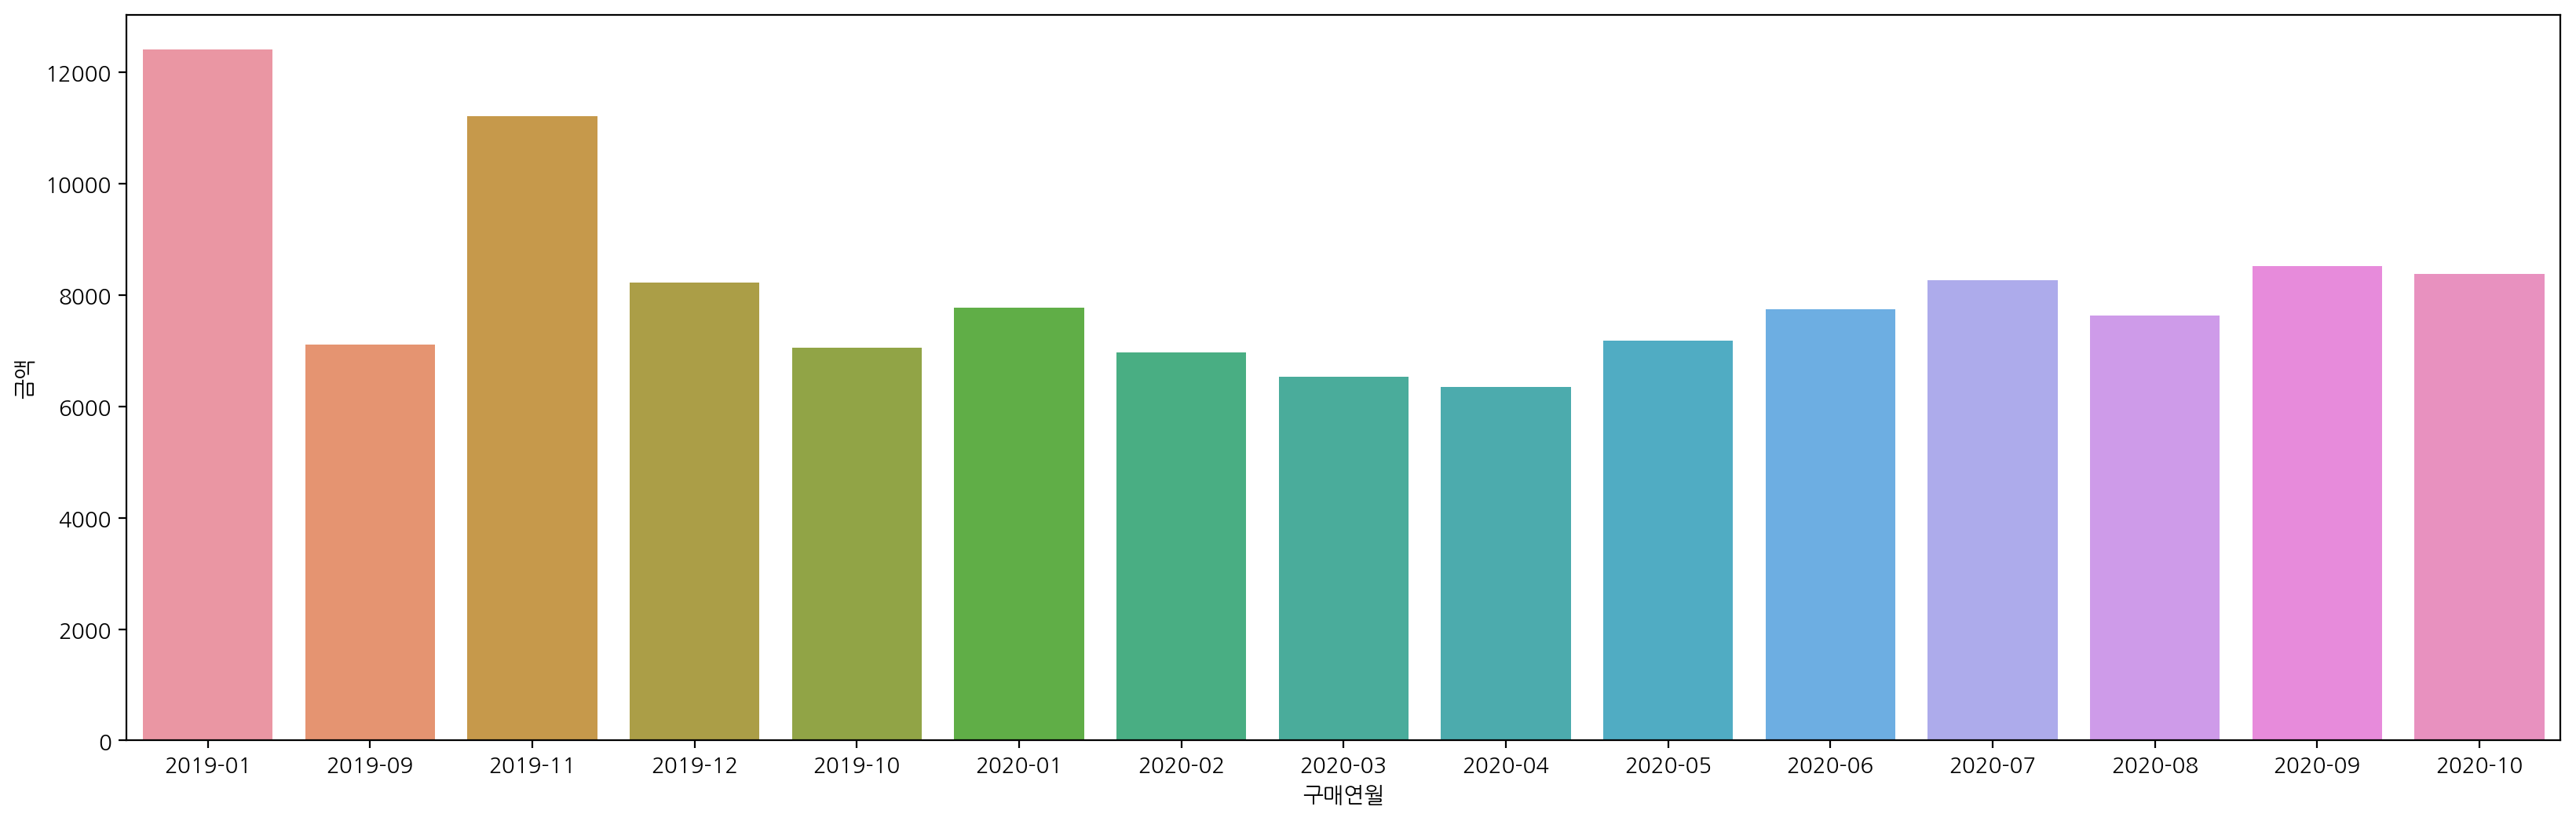

In [292]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x="구매연월", y="금액", ci=None)

<AxesSubplot:xlabel='구매연월', ylabel='금액'>

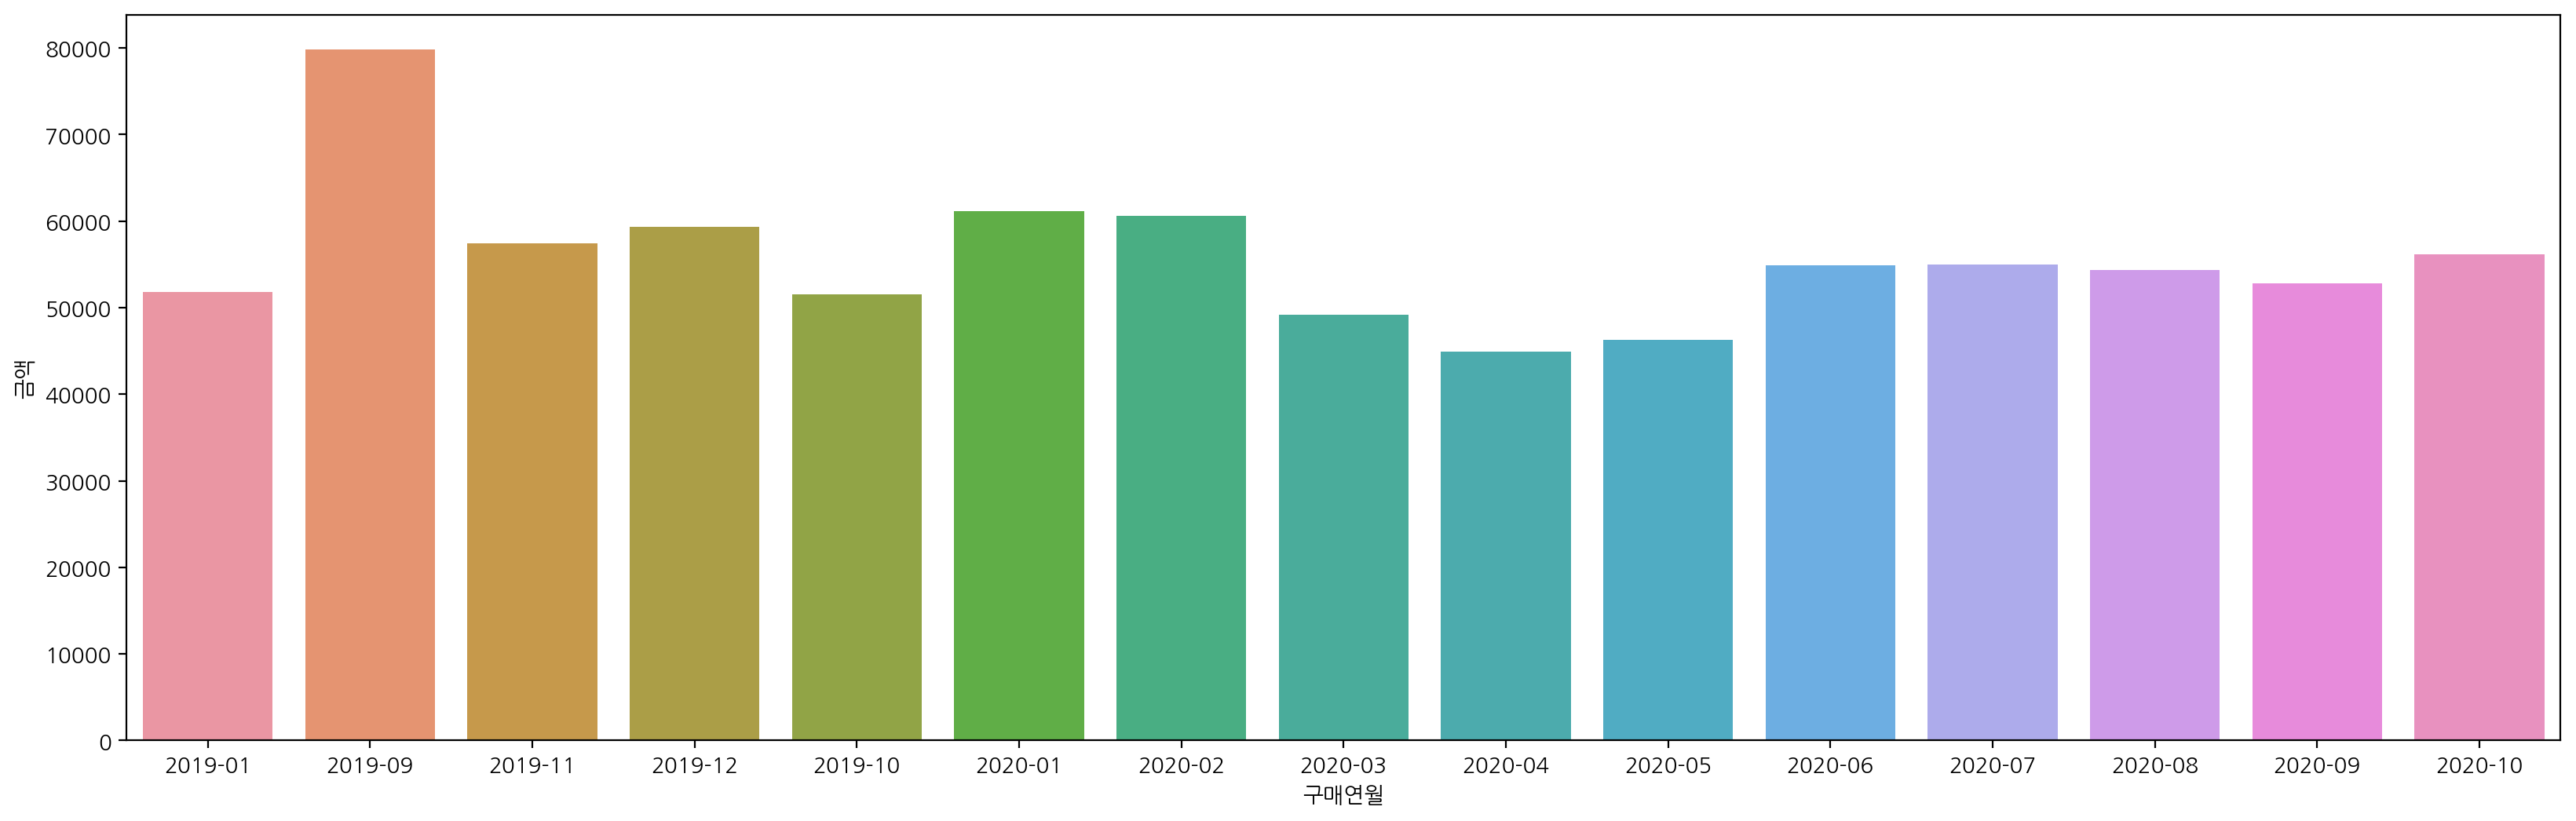

In [494]:
plt.figure(figsize=(20,6))
sns.barplot(data=df_user, x="구매연월", y="금액", ci=None, order=df["구매연월"].sort_index().drop_duplicates().values)

<AxesSubplot:xlabel='구매연월', ylabel='금액'>

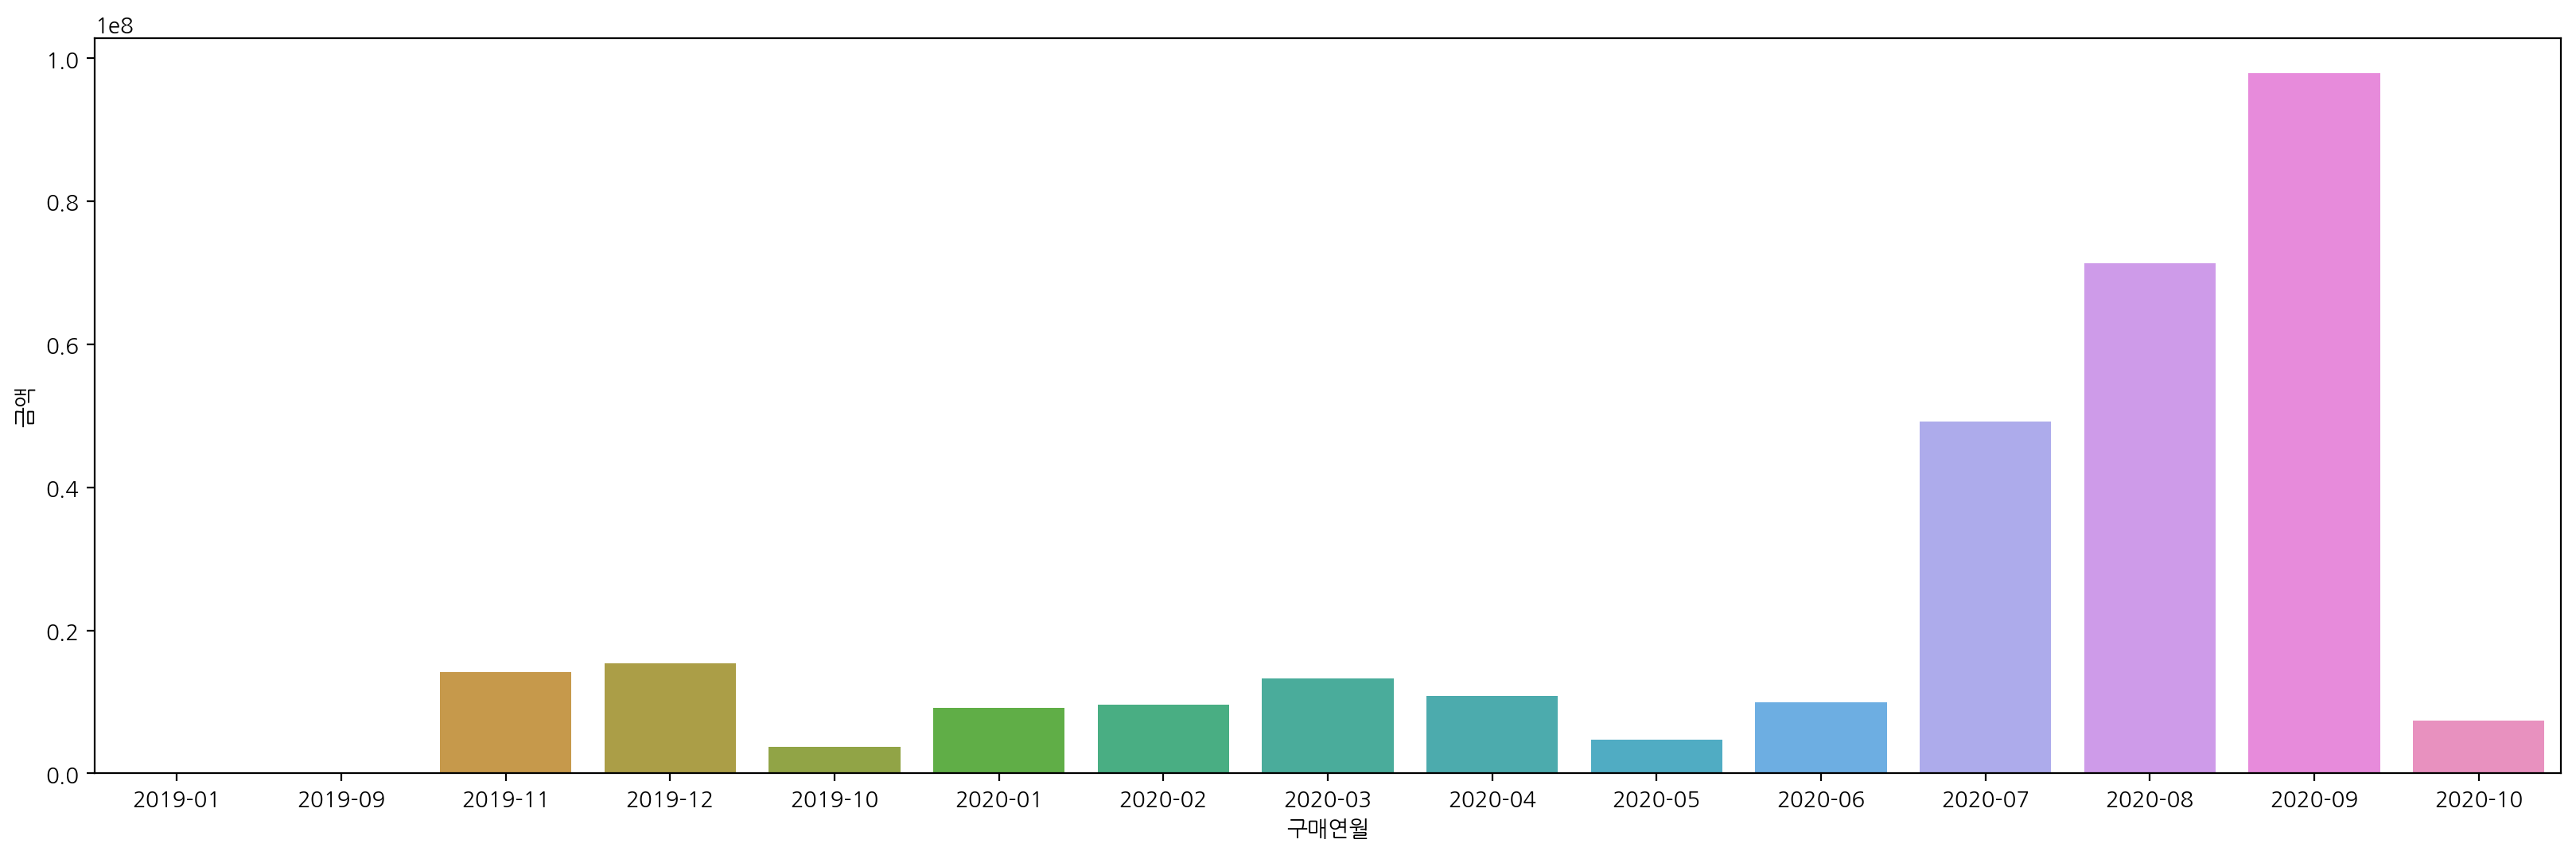

In [293]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x="구매연월", y="금액", ci=None, estimator=sum)

<AxesSubplot:xlabel='구매연월', ylabel='금액'>

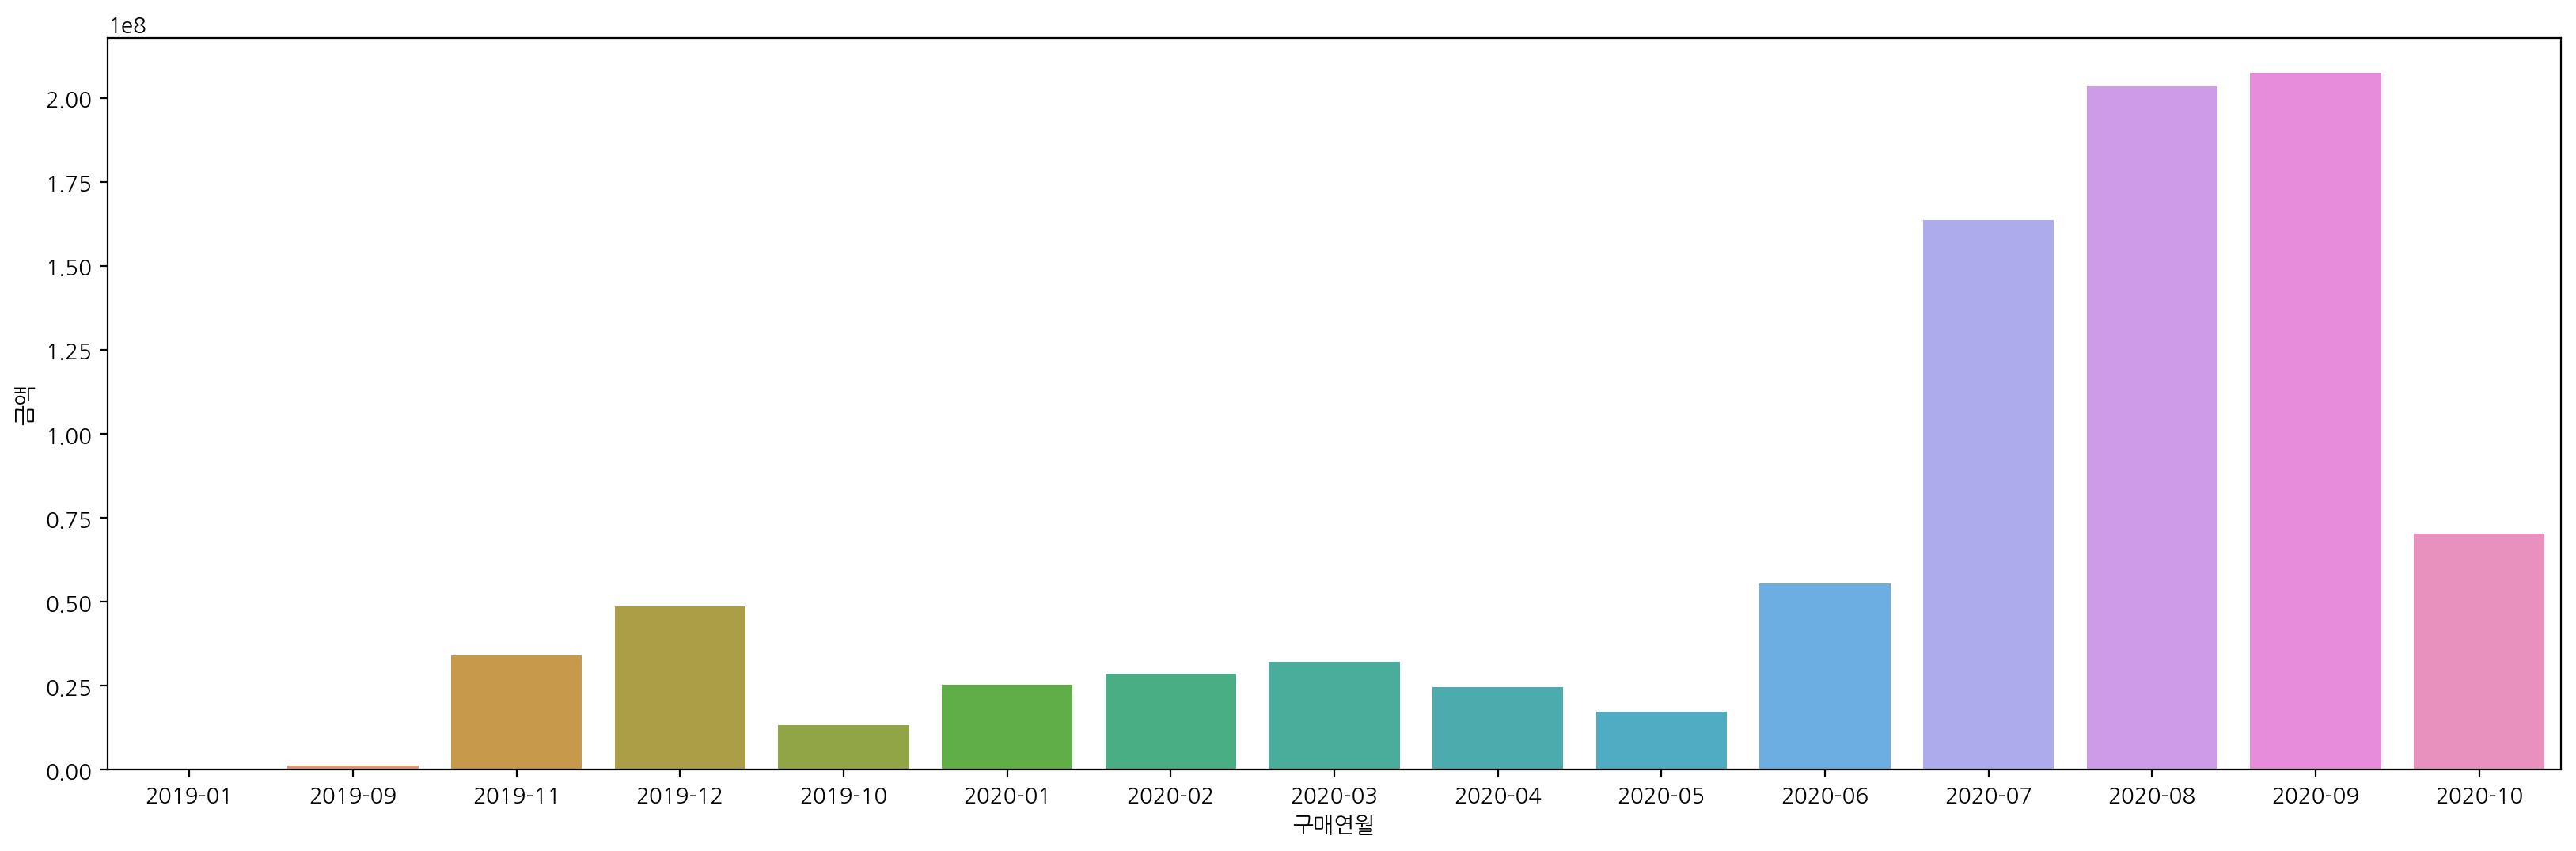

In [492]:
plt.figure(figsize=(20,6))
sns.barplot(data=df_user, x="구매연월", y="금액", ci=None, estimator=sum, order=df["구매연월"].sort_index().drop_duplicates().values)

<AxesSubplot:xlabel='구매연월', ylabel='count'>

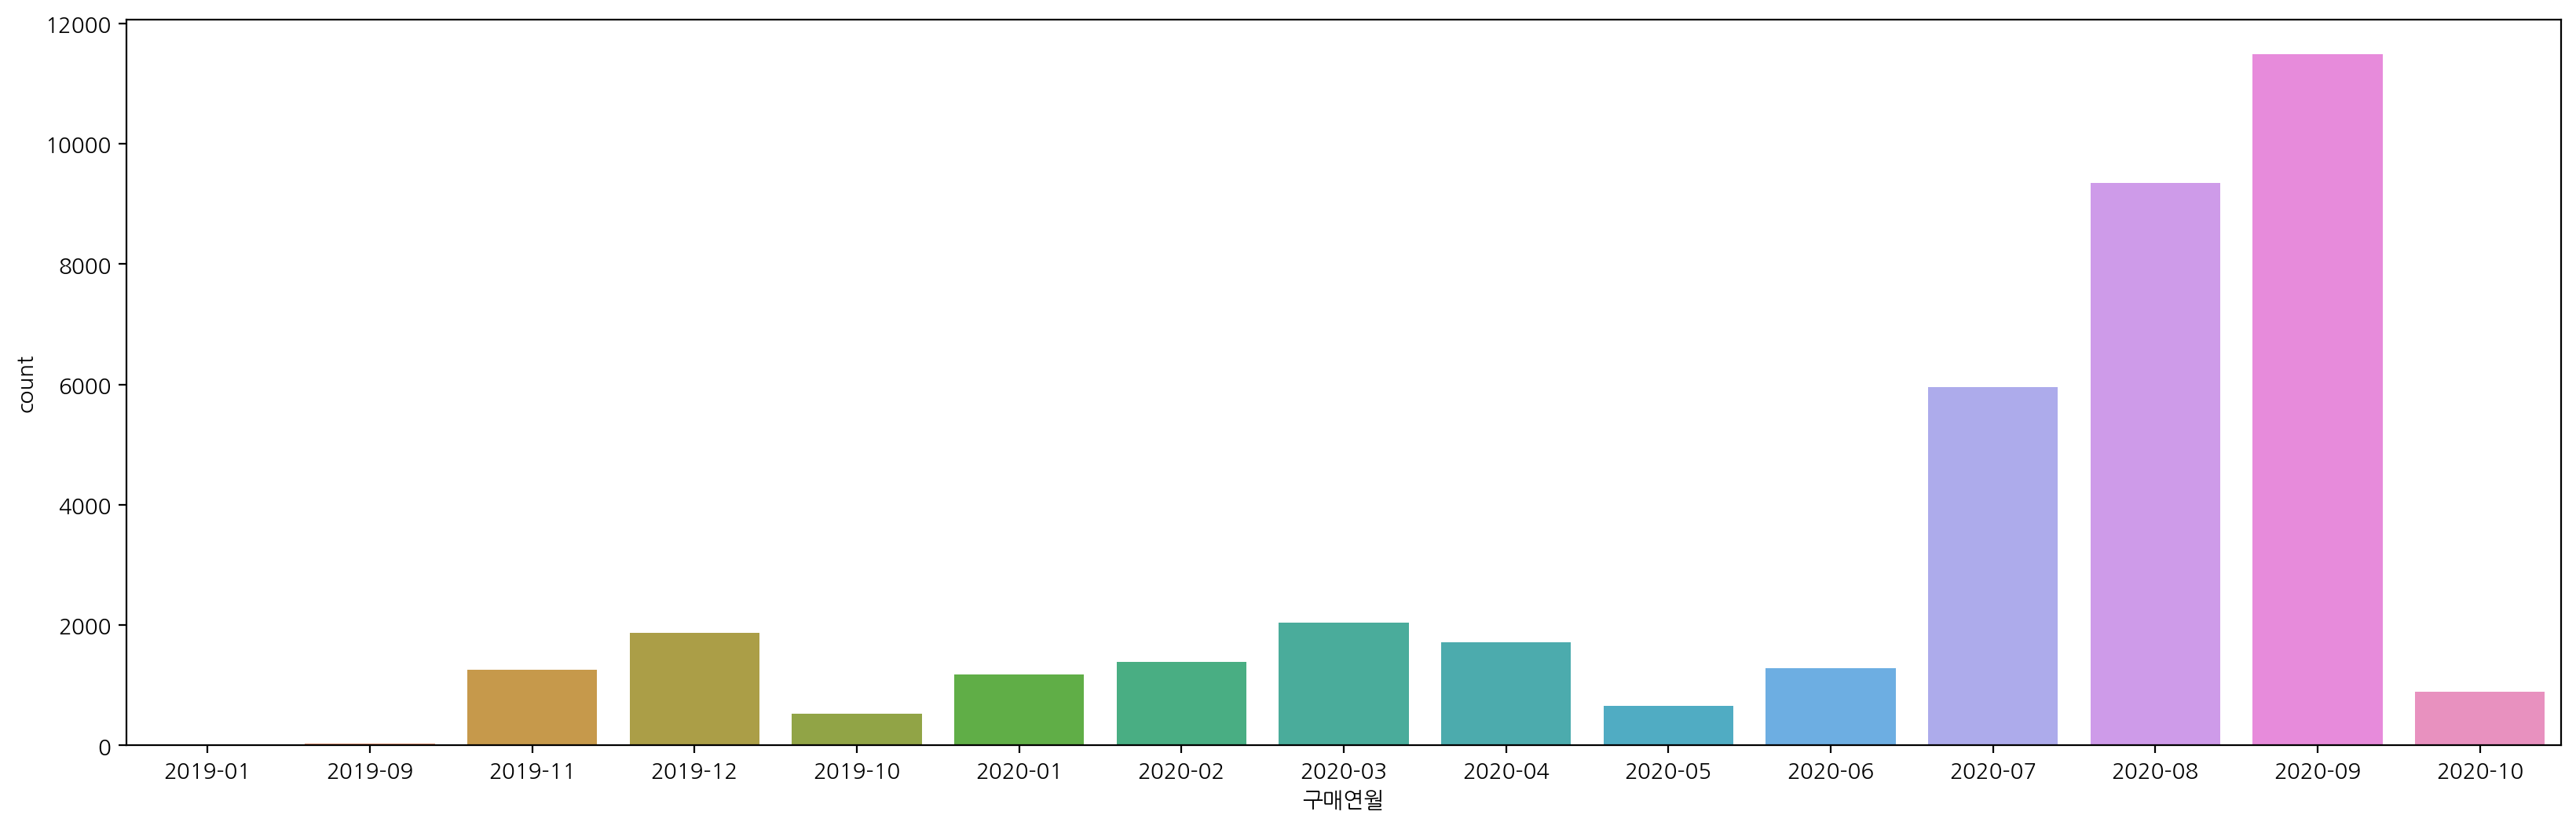

In [295]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x="구매연월")

<AxesSubplot:xlabel='구매연월', ylabel='count'>

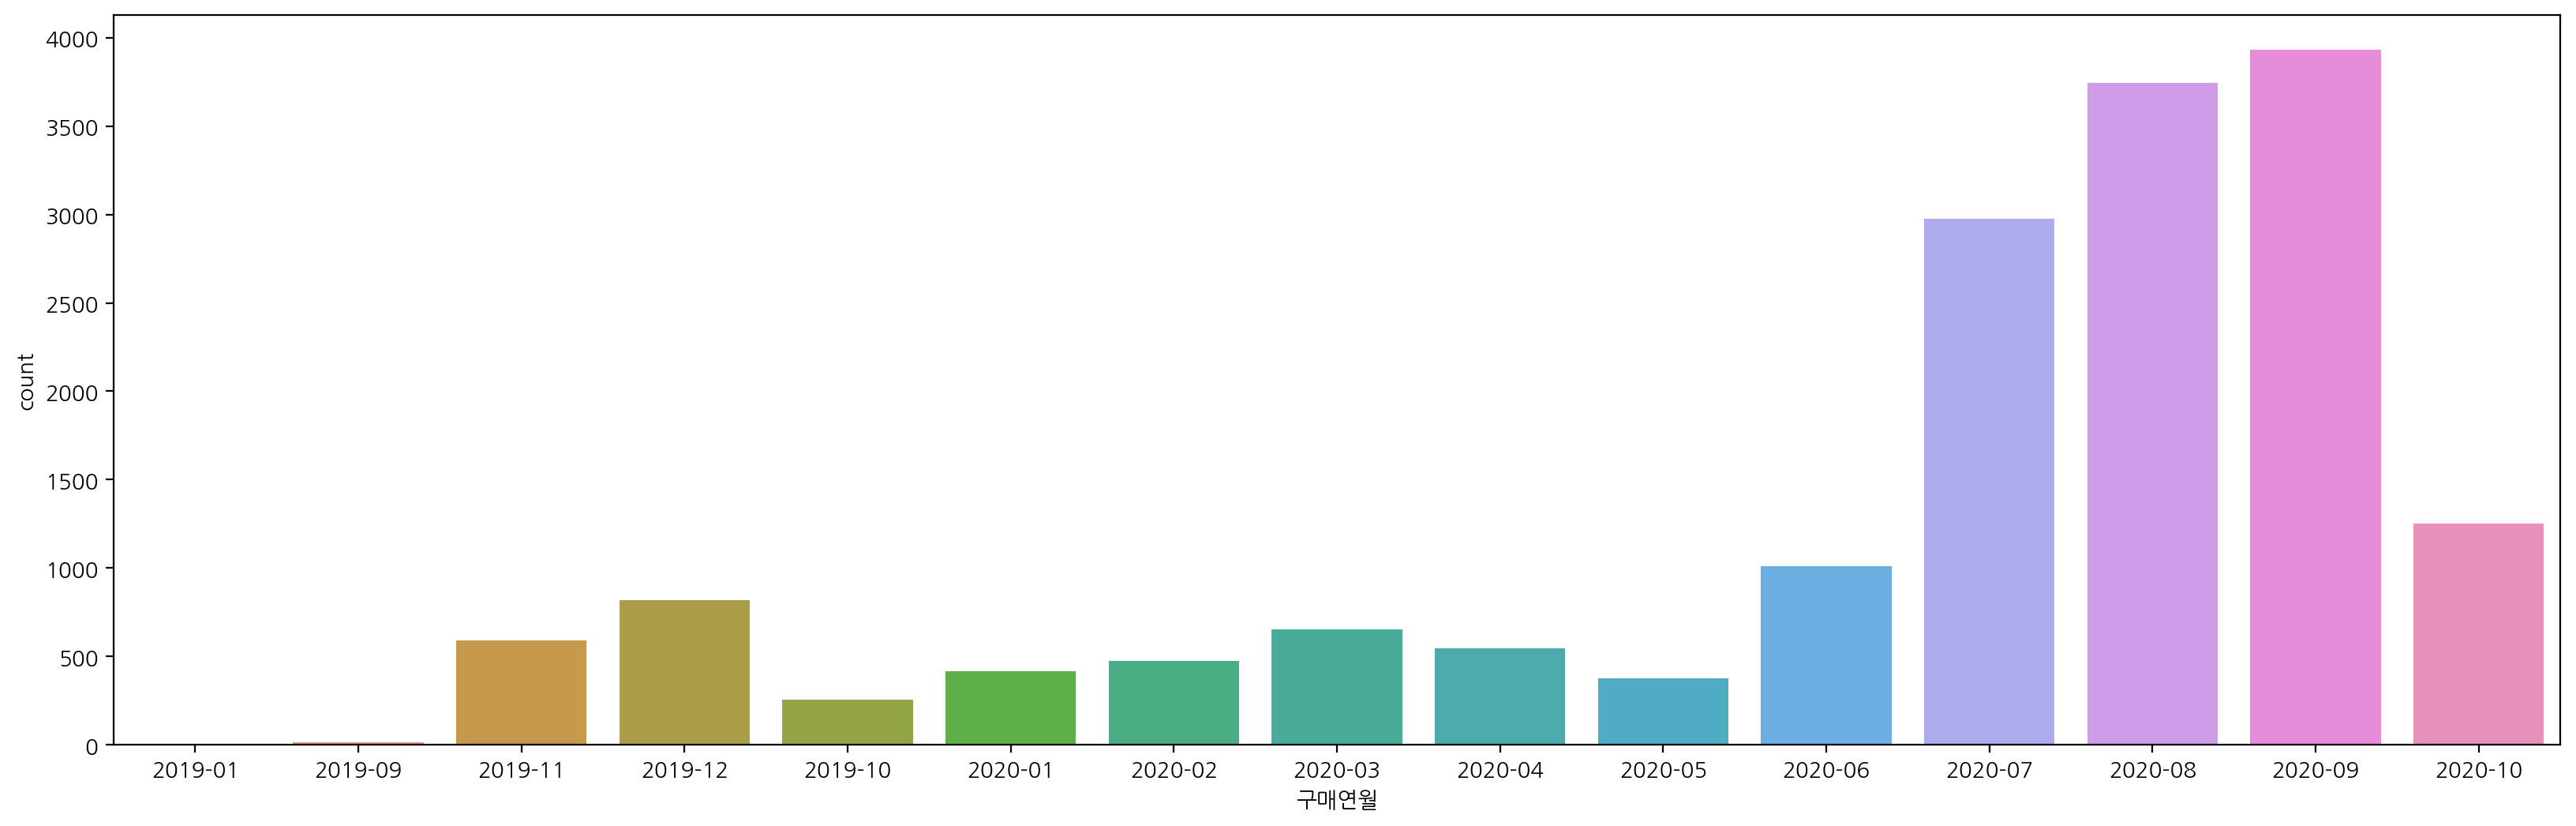

In [493]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_user, x="구매연월", order=df["구매연월"].sort_index().drop_duplicates().values)

In [500]:
many_month = df.loc[df["구매연월"].isin(["2020-07", "2020-08", "2020-09"])]
many_month

,구매건별ID,주문번호,사용자ID,구매날짜,구매주차,리테일러,상품코드,상품명,구매갯수,상품개당가격,연령대,성별,마스터상품번호,마스터상품명,마스터카테고리코드,마스터카테고리이름,금액,구매연월,대분류
10782,226988,b4825a81effbec20596a9125643b23d9,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,2500000011528,(A)깐양파(봉),1,3000,30,F,2500000011528,(A)깐양파(봉),C001001200060001,채소->양파 · 마늘 · 생강 · 파->양파,3000,2020-07,채소
10783,226989,859c93d995421066efd829cecb3927b9,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,1133620069801,(마녀족발)찰순대,1,7000,30,F,1133620069801,(마녀족발)찰순대,C001001600080004,우유 · 냉장냉동 · 간편식->가정간편식->야식 · 안주 · 볶음류,7000,2020-07,우유
10784,226990,c4a085cba9c14fb870b14e84b4f44b66,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,8801496106816,1+ 등급란 10개입 특,1,3000,30,F,8801496106816,1+ 등급란 10개입 특,C001001400070001,정육 · 계란->계란->계란 10구이하,3000,2020-07,정육
10785,226991,3a06025107690b4c005a1a0b4db06179,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,8801115118183,서울 저지방우유 1L,1,2700,30,F,8801115118183,"서울 저지방 우유(1,000ML)",C001001600090002,우유 · 냉장냉동 · 간편식->우유 · 요구르트->기능성 흰우유,2700,2020-07,우유
10786,226992,dababf0efde222e87874be064bc2ed6d,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,8809361684971,간편한버터모닝롤,1,4200,30,F,8809361684971,간편한버터모닝롤,C001001600100004,우유 · 냉장냉동 · 간편식->치즈 · 버터 · 디저트->버터 · 마가린,4200,2020-07,우유
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,319295,ce819e548afadf8abde0ba9746a0c20b,63e631e9cf335fce6b548b845fe0cea7,2020-07-31,20200131,C,8801027883629,홉하우스 13 라거 500,1,12000,40,M,8801027883629,홉하우스 13 라거 500,C001002600020003,주방 · 청소 · 욕실용품->컵 · 용품->유리잔,12000,2020-07,주방
39613,319296,2ab2119c0326462d09b6874f123b35f7,63e631e9cf335fce6b548b845fe0cea7,2020-07-31,20200131,C,2500000165627,단단한 복숭아 3kg,1,17000,40,M,2500000165627,단단한 복숭아 3kg,C001001300150004,과일->포도 · 수입포도 · 복숭아 · 자두 · 살구->복숭아,17000,2020-07,과일
39614,319297,6a22c3b37ed8b9353e80e4217cff19cb,63e631e9cf335fce6b548b845fe0cea7,2020-07-31,20200131,C,8801166369534,하기스 매직팬티 컴포,2,38000,40,M,8801166365451,하기스 매직팬티 컴포,C001002100020001,유아 · 출산용품->기저귀 · 물티슈->기저귀-하기스,76000,2020-07,유아
39615,319298,5613b565360ad4b9852e3871f9c0c62a,63e631e9cf335fce6b548b845fe0cea7,2020-07-23,20200130,C,8801155738587,아기치즈 2단계 850g,1,17000,40,M,8801155738587,아기치즈 2단계 850g,C001001600100002,우유 · 냉장냉동 · 간편식->치즈 · 버터 · 디저트->자연 · 피자치즈,17000,2020-07,우유


In [309]:
many_month["마스터카테고리코드"].value_counts().nlargest(55)

C002000000010001    722
C001001700140001    672
C00000000000        578
C001001700010001    483
C001005900050001    406
C001001600090001    340
C001001700140002    276
C001001600080001    260
C001001400030003    255
C001001600090004    252
C001001700140010    223
C001001400040001    222
C001001200110006    221
C001001300080001    214
C001001600090005    210
C001001600080004    201
C001005500030003    191
C001001200100002    188
C001001700140004    187
C001001700010003    177
C001001700110005    177
C001001600010001    177
C001001400070002    175
C001001700130006    173
C001001700130004    170
C001001300150004    165
C001001200050001    157
C001001700130012    157
C001001200080001    155
C001002600040003    144
C001001600020002    144
C001001400040008    142
C001001200040002    140
C001001600030005    137
C001001600080003    136
C001001700130001    136
C001001200060001    135
C001001600090002    133
C001001200110002    128
C001001700060004    127
C001002700070009    122
C001001700060005

In [304]:
large_category = many_month["마스터카테고리코드"].value_counts().nlargest(55).index
large_category

Index(['C002000000010001', 'C001001700140001', 'C00000000000',
       'C001001700010001', 'C001005900050001', 'C001001600090001',
       'C001001700140002', 'C001001600080001', 'C001001400030003',
       'C001001600090004', 'C001001700140010', 'C001001400040001',
       'C001001200110006', 'C001001300080001', 'C001001600090005',
       'C001001600080004', 'C001005500030003', 'C001001200100002',
       'C001001700140004', 'C001001700010003', 'C001001700110005',
       'C001001600010001', 'C001001400070002', 'C001001700130006',
       'C001001700130004', 'C001001300150004', 'C001001200050001',
       'C001001700130012', 'C001001200080001', 'C001002600040003',
       'C001001600020002', 'C001001400040008', 'C001001200040002',
       'C001001600030005', 'C001001600080003', 'C001001700130001',
       'C001001200060001', 'C001001600090002', 'C001001200110002',
       'C001001700060004', 'C001002700070009', 'C001001700060005',
       'C001004000080002', 'C001001200030002', 'C001001700140015',

In [308]:
many_month.loc[many_month["마스터카테고리코드"].isin(large_category), ["마스터카테고리코드", "마스터카테고리이름", "상품명"]]

,마스터카테고리코드,마스터카테고리이름,상품명
10782,C001001200060001,채소->양파 · 마늘 · 생강 · 파->양파,(A)깐양파(봉)
10783,C001001600080004,우유 · 냉장냉동 · 간편식->가정간편식->야식 · 안주 · 볶음류,(마녀족발)찰순대
10785,C001001600090002,우유 · 냉장냉동 · 간편식->우유 · 요구르트->기능성 흰우유,서울 저지방우유 1L
10788,C00000000000,Unknown,대림 마당놀이300g
10790,C001005900050001,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름,배(특) 쇼케이스 팩
...,...,...,...
39606,C001001600090005,우유 · 냉장냉동 · 간편식->우유 · 요구르트->마시는 요구르트,바이오플레인8입
39607,C001001300080001,과일->바나나 · 파인애플->바나나,DOLE 스위티오바나나(
39608,C001001200060001,채소->양파 · 마늘 · 생강 · 파->양파,양파 3kg(망)
39611,C001001600090001,우유 · 냉장냉동 · 간편식->우유 · 요구르트->흰우유,맛있는우유 GT 2.3L


In [340]:
df.loc[df["마스터카테고리코드"] == "C001001200060001", "대분류"] = "채소"

In [342]:
df.loc[df["마스터카테고리코드"] == "C001001600080004", "대분류"] = "간편식"

In [343]:
df.loc[df["마스터카테고리코드"] == "C001001600090002", "대분류"] = "냉장냉동"

In [344]:
df.loc[df["마스터카테고리코드"] == "C001005900050001", "대분류"] = "가전"

In [ ]:
df.loc[df["마스터카테고리코드"] == "C001005900050001", "대분류"] = "가전"

In [371]:
df = df.drop(columns="화장")

In [363]:
df["대분류"] = df["마스터카테고리이름"].str[:2]

In [503]:
min_month = df.loc[df["구매연월"].isin(["2020-02", "2020-03", "2020-04"])]

In [440]:
df.columns

Index(['구매건별ID', '주문번호', '사용자ID', '구매날짜', '구매주차', '리테일러', '상품코드', '상품명',
       '구매갯수', '상품개당가격', '연령대', '성별', '마스터상품번호', '마스터상품명', '마스터카테고리코드',
       '마스터카테고리이름', '금액', '구매연월', '대분류'],
      dtype='object')

In [478]:
min_month_man = min_month[["사용자ID", "연령대", "구매연월"]].drop_duplicates()

In [451]:
min_month.groupby(["사용자ID", "구매날짜"])[["금액"]].sum()

금액
사용자ID                            구매날짜             
01d66d4dc2bed35e00c81c99890b4231 2020-02-14  27000
                                 2020-02-22  28600
01db46f7d82fa0d9efacca258bfb11a3 2020-03-21  23300
                                 2020-03-26   9000
                                 2020-03-28  22100
...                                            ...
fe772d8c233470eff492d06722e201d5 2020-02-05  49400
                                 2020-02-17  92500
                                 2020-02-21   9800
                                 2020-03-09  20400
                                 2020-03-11  23900

[649 rows x 1 columns]

In [479]:
min_month_per = min_month.groupby(["사용자ID", "구매날짜"])[["금액"]].sum().merge(min_month_man, on="사용자ID")
min_month_per

,사용자ID,금액,연령대,구매연월
0,01d66d4dc2bed35e00c81c99890b4231,27000,50,2020-02
1,01d66d4dc2bed35e00c81c99890b4231,28600,50,2020-02
2,01db46f7d82fa0d9efacca258bfb11a3,23300,30,2020-04
3,01db46f7d82fa0d9efacca258bfb11a3,23300,30,2020-03
4,01db46f7d82fa0d9efacca258bfb11a3,9000,30,2020-04
...,...,...,...,...
1141,fe772d8c233470eff492d06722e201d5,9800,30,2020-02
1142,fe772d8c233470eff492d06722e201d5,20400,30,2020-03
1143,fe772d8c233470eff492d06722e201d5,20400,30,2020-02
1144,fe772d8c233470eff492d06722e201d5,23900,30,2020-03


In [482]:
many_month_man = many_month[["사용자ID", "연령대", "구매연월"]].drop_duplicates()

In [480]:
many_month.groupby(["사용자ID", "구매날짜", "구매연월"])[["금액"]].sum()

금액
사용자ID                            구매날짜       구매연월           
00799ddfe6d577b52e067311fa164ebc 2020-09-12 2020-09   62300
01496bb145f6bc1c1a721e09024151d3 2020-07-28 2020-07   58100
                                 2020-08-12 2020-08   36400
                                 2020-08-19 2020-08    4600
                                 2020-08-25 2020-08    5100
...                                                     ...
ff00096f2a1f2bbe51ddabe2eb410608 2020-09-27 2020-09  126900
ff3b3e9fdad2c3e487ea4b8b9decfb0a 2020-08-26 2020-08   30300
                                 2020-09-20 2020-09   51300
ffa1e9447f222e3a0ffa3b7a08d846d4 2020-07-17 2020-07   89800
                                 2020-09-11 2020-09  102300

[3897 rows x 1 columns]

In [505]:
many_month_per = many_month.groupby(["사용자ID", "구매날짜"])[["금액"]].sum().merge(many_month_man, on="사용자ID")
many_month_per

,사용자ID,금액,연령대,구매연월
0,00799ddfe6d577b52e067311fa164ebc,62300,30,2020-09
1,01496bb145f6bc1c1a721e09024151d3,58100,40,2020-09
2,01496bb145f6bc1c1a721e09024151d3,58100,40,2020-08
3,01496bb145f6bc1c1a721e09024151d3,58100,40,2020-07
4,01496bb145f6bc1c1a721e09024151d3,36400,40,2020-09
...,...,...,...,...
9366,ff3b3e9fdad2c3e487ea4b8b9decfb0a,51300,30,2020-08
9367,ffa1e9447f222e3a0ffa3b7a08d846d4,89800,30,2020-09
9368,ffa1e9447f222e3a0ffa3b7a08d846d4,89800,30,2020-07
9369,ffa1e9447f222e3a0ffa3b7a08d846d4,102300,30,2020-09


In [ ]:
many_month.groupby(["사용자ID", "구매날짜"])[["금액"]].sum().merge()

<AxesSubplot:xlabel='구매연월', ylabel='count'>

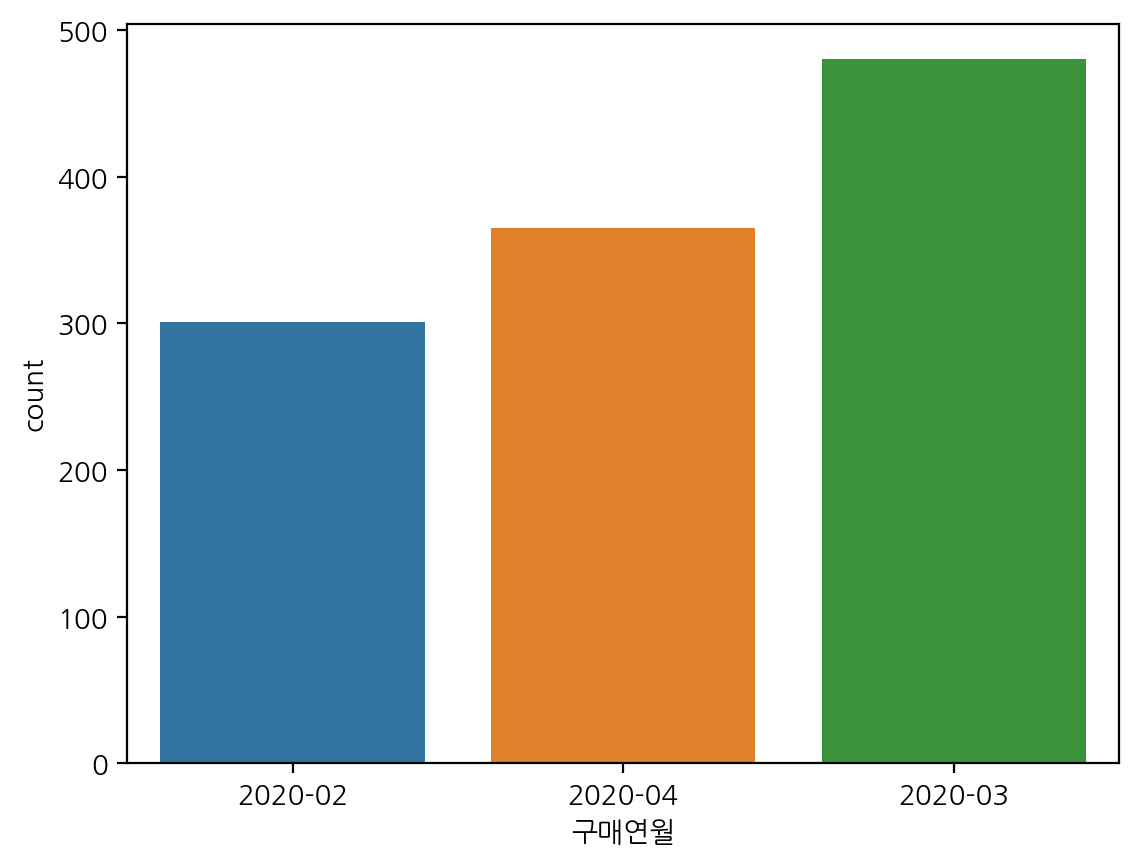

In [485]:
sns.countplot(data=min_month_per, x="구매연월")

<AxesSubplot:xlabel='구매연월', ylabel='count'>

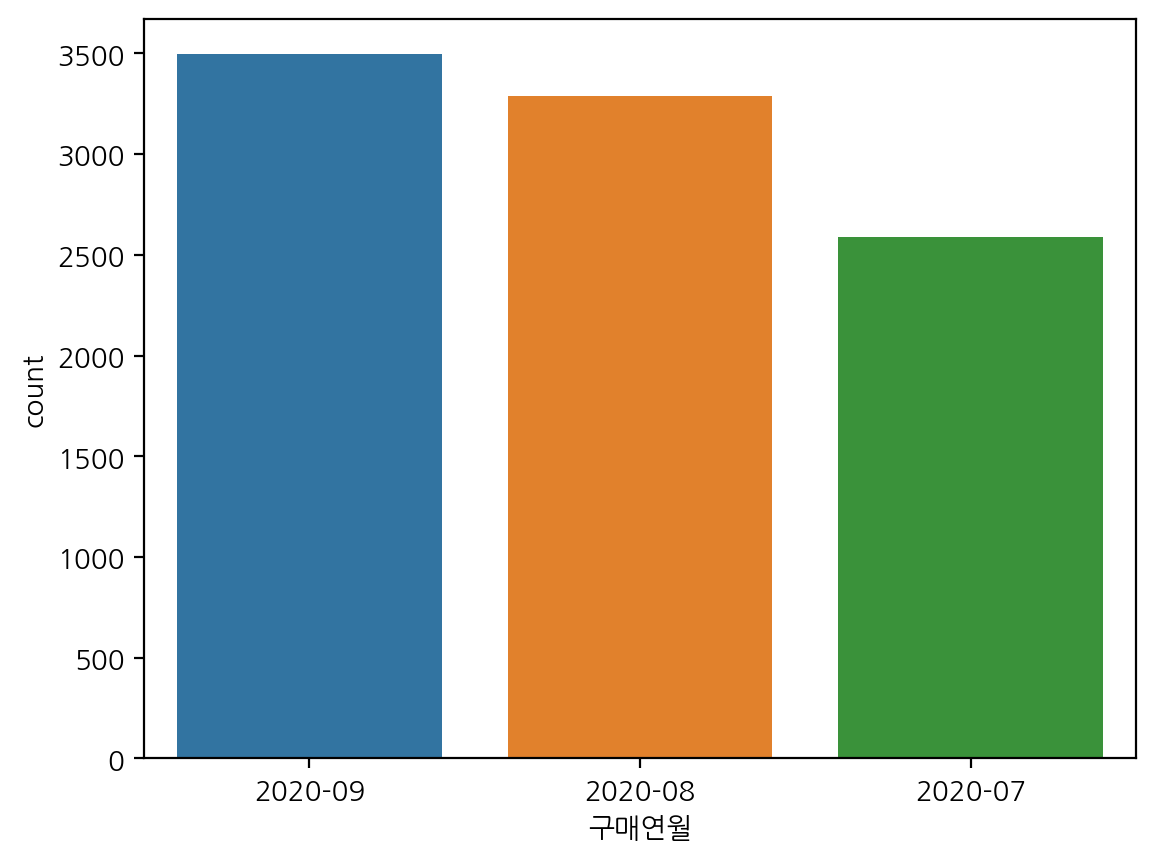

In [484]:
sns.countplot(data=many_month_per, x="구매연월")

<AxesSubplot:xlabel='연령대', ylabel='금액'>

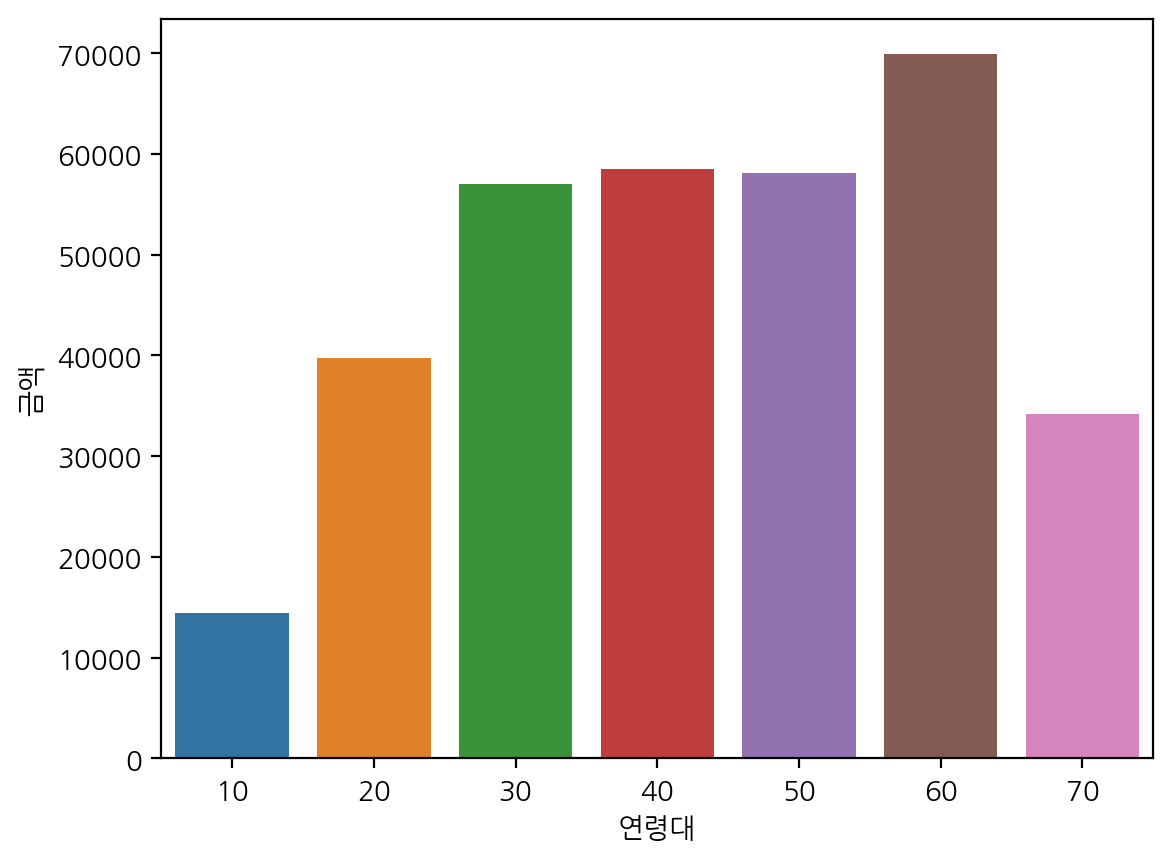

In [462]:
sns.barplot(data=many_month_per, x="연령대", y="금액", ci=None)

<AxesSubplot:xlabel='연령대', ylabel='금액'>

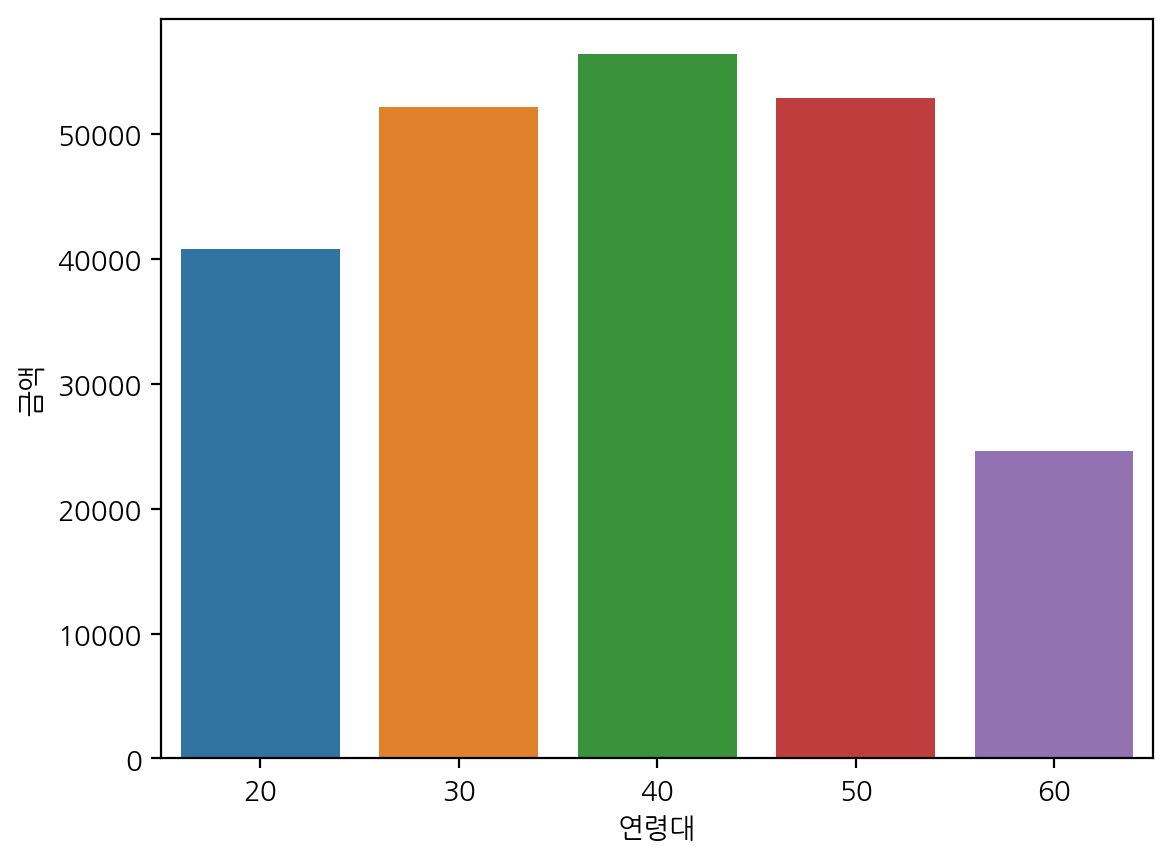

In [455]:
sns.barplot(data=min_month_per, x="연령대", y="금액", ci=None)

<AxesSubplot:xlabel='연령대', ylabel='금액'>

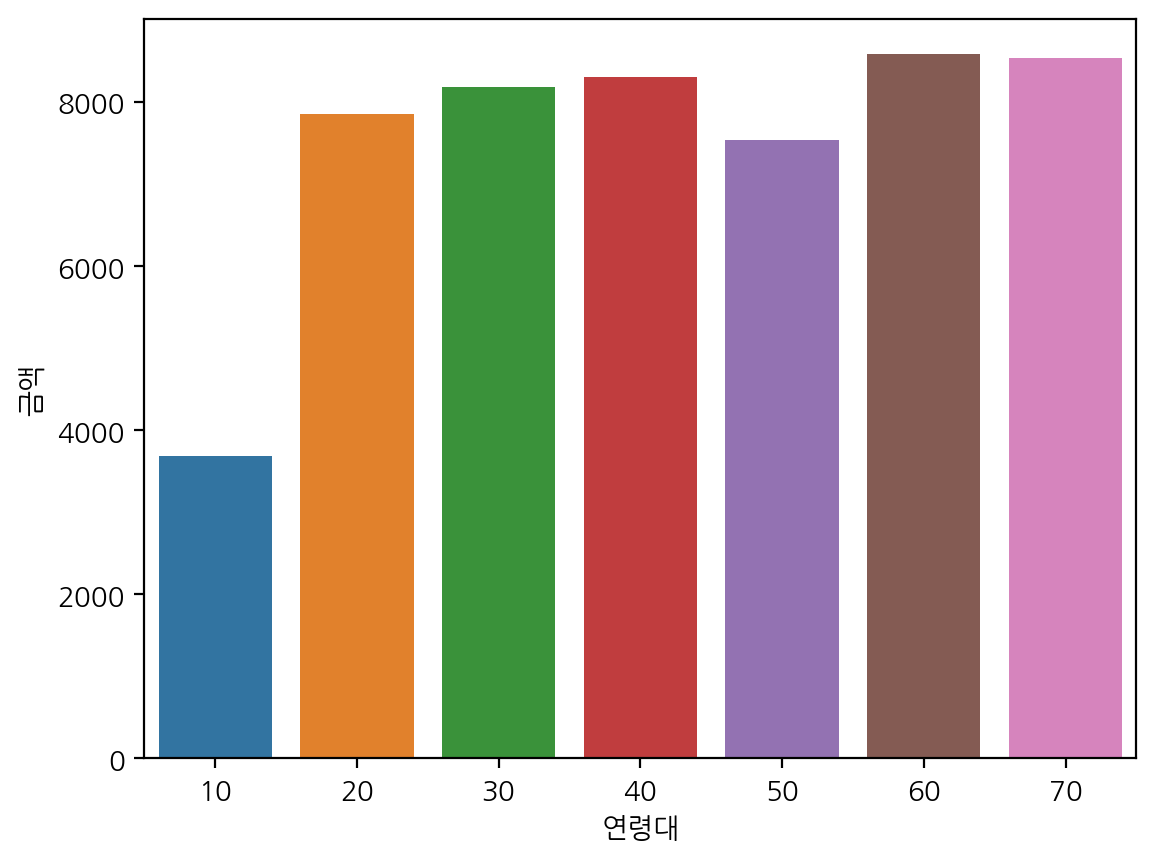

In [466]:
sns.barplot(data=many_month, x="연령대", y="금액", ci=None)

<AxesSubplot:xlabel='연령대', ylabel='금액'>

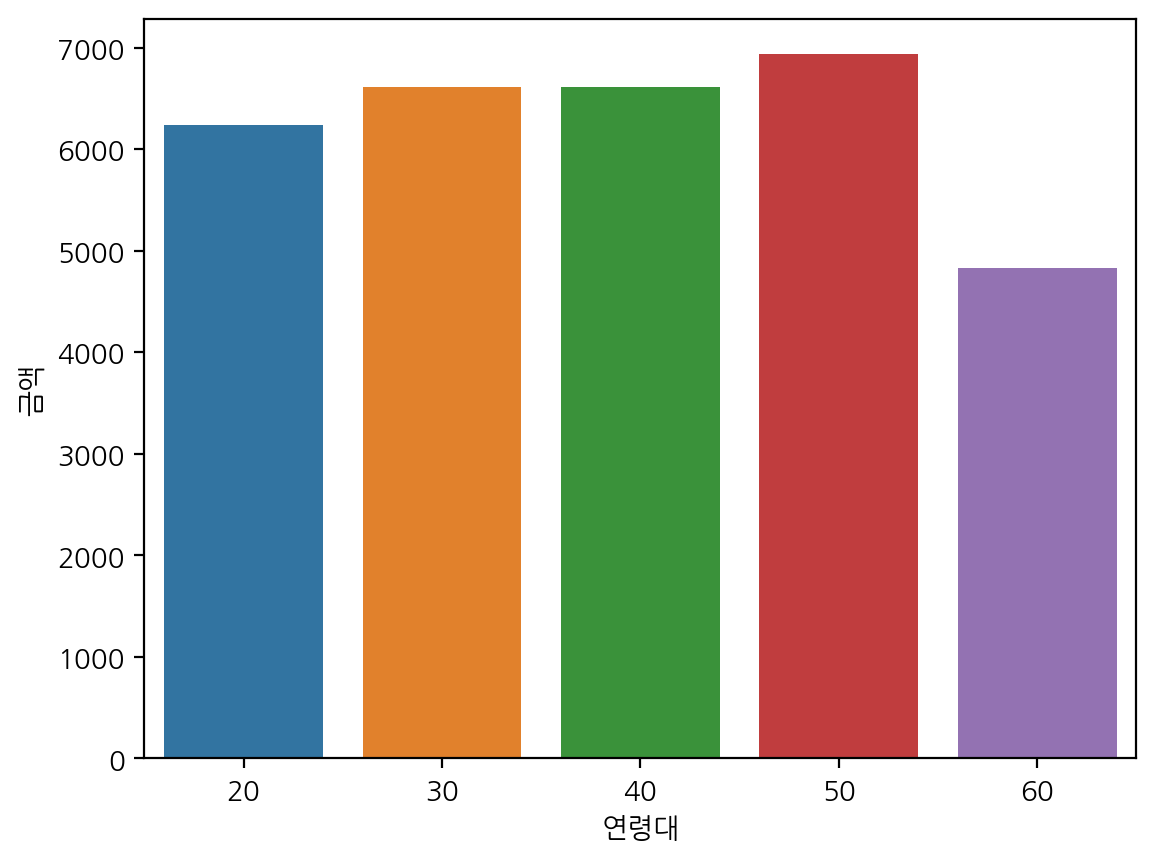

In [445]:
sns.barplot(data=min_month, x="연령대", y="금액", ci=None)

<AxesSubplot:xlabel='연령대', ylabel='count'>

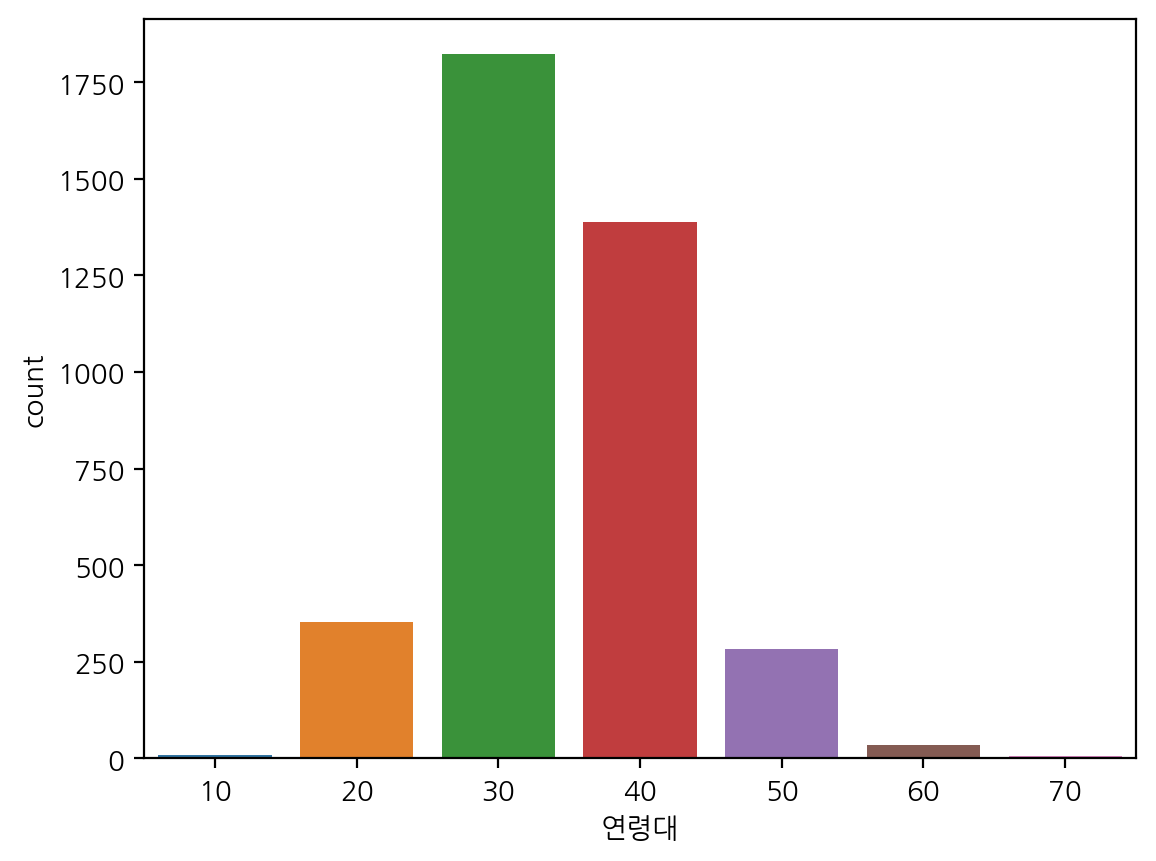

In [465]:
sns.countplot(data=many_month_per, x="연령대")

<AxesSubplot:xlabel='연령대', ylabel='count'>

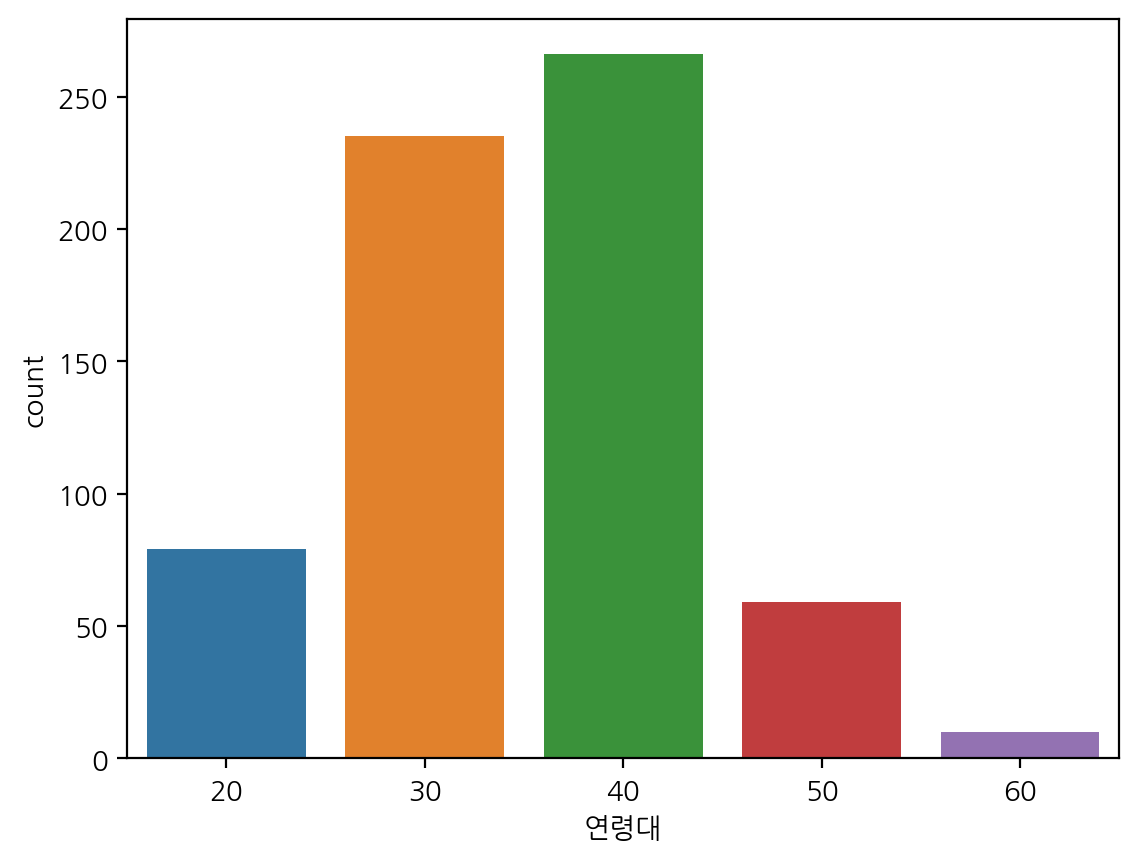

In [464]:
sns.countplot(data=min_month_per, x="연령대")

In [ ]:
sns.countplot(data=min_month, x="연령대")

In [436]:
df.loc[df["구매연월"].isin(["2020-02", "2020-03", "2020-04"])]["대분류"].value_counts()

생수        1587
우유         774
채소         599
정육         350
주방         239
과일         192
생선         152
문구         120
기타         116
주류         114
가전          86
침구          86
반려동물        74
치킨          61
가구          53
유아          49
세제          47
잡곡          45
언더웨어        44
소포장먹거리      37
휴지          34
스포츠         33
견과          29
구강          28
유기농         27
여성케어        27
풋핸드         25
의류          24
헤어          15
화장품         13
영양제         13
건강용품        11
잡화          10
바디          10
신발           9
남성케어         6
홍삼           1
Name: 대분류, dtype: int64

In [435]:
df["대분류"].value_counts()

생수        11156
우유         6193
채소         4273
정육         2710
주방         1876
과일         1749
생선         1476
주류         1006
문구          954
기타          944
가전          682
반려동물        577
가구          542
침구          540
치킨          467
세제          458
언더웨어        411
유아          364
견과          350
의류          340
스포츠         306
소포장먹거리      282
유기농         255
잡곡          253
휴지          228
구강          227
여성케어        148
헤어          130
건강용품        123
화장품         120
바디           99
잡화           98
신발           81
풋핸드          81
영양제          66
남성케어         30
홍삼           16
Name: 대분류, dtype: int64

In [535]:
df.loc[df["대분류"] == "주방", "마스터카테고리이름"]

85              주방 · 청소 · 욕실용품->일회용품 · 소모품->랩
196               주방 · 청소 · 욕실용품->컵 · 용품->머그잔
272               주방 · 청소 · 욕실용품->주방정리용품->수세미
273               주방 · 청소 · 욕실용품->컵 · 용품->와인잔
282      주방 · 청소 · 욕실용품->조리도구->요리스푼 · 집게 · 기타
                         ...                 
39557    주방 · 청소 · 욕실용품->조리도구->요리스푼 · 집게 · 기타
39559             주방 · 청소 · 욕실용품->컵 · 용품->유리잔
39566             주방 · 청소 · 욕실용품->그릇 · 수저->공기
39599            주방 · 청소 · 욕실용품->주방정리용품->고무장갑
39612             주방 · 청소 · 욕실용품->컵 · 용품->유리잔
Name: 마스터카테고리이름, Length: 1876, dtype: object

In [432]:
df.loc[df["대분류"] == "유기", "대분류"] = "유기농"

In [499]:
many_month

,구매건별ID,주문번호,사용자ID,구매날짜,구매주차,리테일러,상품코드,상품명,구매갯수,상품개당가격,연령대,성별,마스터상품번호,마스터상품명,마스터카테고리코드,마스터카테고리이름,금액,구매연월
10782,226988,b4825a81effbec20596a9125643b23d9,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,2500000011528,(A)깐양파(봉),1,3000,30,F,2500000011528,(A)깐양파(봉),C001001200060001,채소->양파 · 마늘 · 생강 · 파->양파,3000,2020-07
10783,226989,859c93d995421066efd829cecb3927b9,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,1133620069801,(마녀족발)찰순대,1,7000,30,F,1133620069801,(마녀족발)찰순대,C001001600080004,우유 · 냉장냉동 · 간편식->가정간편식->야식 · 안주 · 볶음류,7000,2020-07
10784,226990,c4a085cba9c14fb870b14e84b4f44b66,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,8801496106816,1+ 등급란 10개입 특,1,3000,30,F,8801496106816,1+ 등급란 10개입 특,C001001400070001,정육 · 계란->계란->계란 10구이하,3000,2020-07
10785,226991,3a06025107690b4c005a1a0b4db06179,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,8801115118183,서울 저지방우유 1L,1,2700,30,F,8801115118183,"서울 저지방 우유(1,000ML)",C001001600090002,우유 · 냉장냉동 · 간편식->우유 · 요구르트->기능성 흰우유,2700,2020-07
10786,226992,dababf0efde222e87874be064bc2ed6d,9ec843a41a00bf156c145766944c8d50,2020-07-03,20200127,C,8809361684971,간편한버터모닝롤,1,4200,30,F,8809361684971,간편한버터모닝롤,C001001600100004,우유 · 냉장냉동 · 간편식->치즈 · 버터 · 디저트->버터 · 마가린,4200,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,319295,ce819e548afadf8abde0ba9746a0c20b,63e631e9cf335fce6b548b845fe0cea7,2020-07-31,20200131,C,8801027883629,홉하우스 13 라거 500,1,12000,40,M,8801027883629,홉하우스 13 라거 500,C001002600020003,주방 · 청소 · 욕실용품->컵 · 용품->유리잔,12000,2020-07
39613,319296,2ab2119c0326462d09b6874f123b35f7,63e631e9cf335fce6b548b845fe0cea7,2020-07-31,20200131,C,2500000165627,단단한 복숭아 3kg,1,17000,40,M,2500000165627,단단한 복숭아 3kg,C001001300150004,과일->포도 · 수입포도 · 복숭아 · 자두 · 살구->복숭아,17000,2020-07
39614,319297,6a22c3b37ed8b9353e80e4217cff19cb,63e631e9cf335fce6b548b845fe0cea7,2020-07-31,20200131,C,8801166369534,하기스 매직팬티 컴포,2,38000,40,M,8801166365451,하기스 매직팬티 컴포,C001002100020001,유아 · 출산용품->기저귀 · 물티슈->기저귀-하기스,76000,2020-07
39615,319298,5613b565360ad4b9852e3871f9c0c62a,63e631e9cf335fce6b548b845fe0cea7,2020-07-23,20200130,C,8801155738587,아기치즈 2단계 850g,1,17000,40,M,8801155738587,아기치즈 2단계 850g,C001001600100002,우유 · 냉장냉동 · 간편식->치즈 · 버터 · 디저트->자연 · 피자치즈,17000,2020-07


In [502]:
many_month.loc[many_month["대분류"] == "반려동물", ["상품명", "구매갯수", "금액", "마스터카테고리이름"]]

,상품명,구매갯수,금액,마스터카테고리이름
11180,닭똥집,1,4200,반려동물용품->애견식품->애견간식
11214,닭똥집,1,4200,반려동물용품->애견식품->애견간식
11217,D크랜베리치킨샌드위,2,18000,반려동물용품->애견식품->애견간식
11223,햇사레부드러운3kg,1,17000,반려동물용품->애견용품->애견잡화
11436,[그린]햄스터 사료,1,6900,반려동물용품->수족관 · 기타동물->소동물용품
...,...,...,...,...
39431,앞다리(호주/팩)_1 Kg,1,20900,반려동물용품->애견식품->애견일반사료
39492,오리바베큐슬라이스60,1,7000,반려동물용품->애견식품->애견간식
39542,덴티페어리SS,1,10000,반려동물용품->애견식품->애견껌
39544,터키츄칠면본S,2,2000,반려동물용품->애견식품->애견껌


In [509]:
large_category = many_month["대분류"].value_counts().nlargest(12).index
large_category

Index(['생수', '우유', '채소', '정육', '주방', '과일', '생선', '주류', '문구', '기타', '가전',
       '반려동물'],
      dtype='object')

<AxesSubplot:xlabel='대분류', ylabel='금액'>

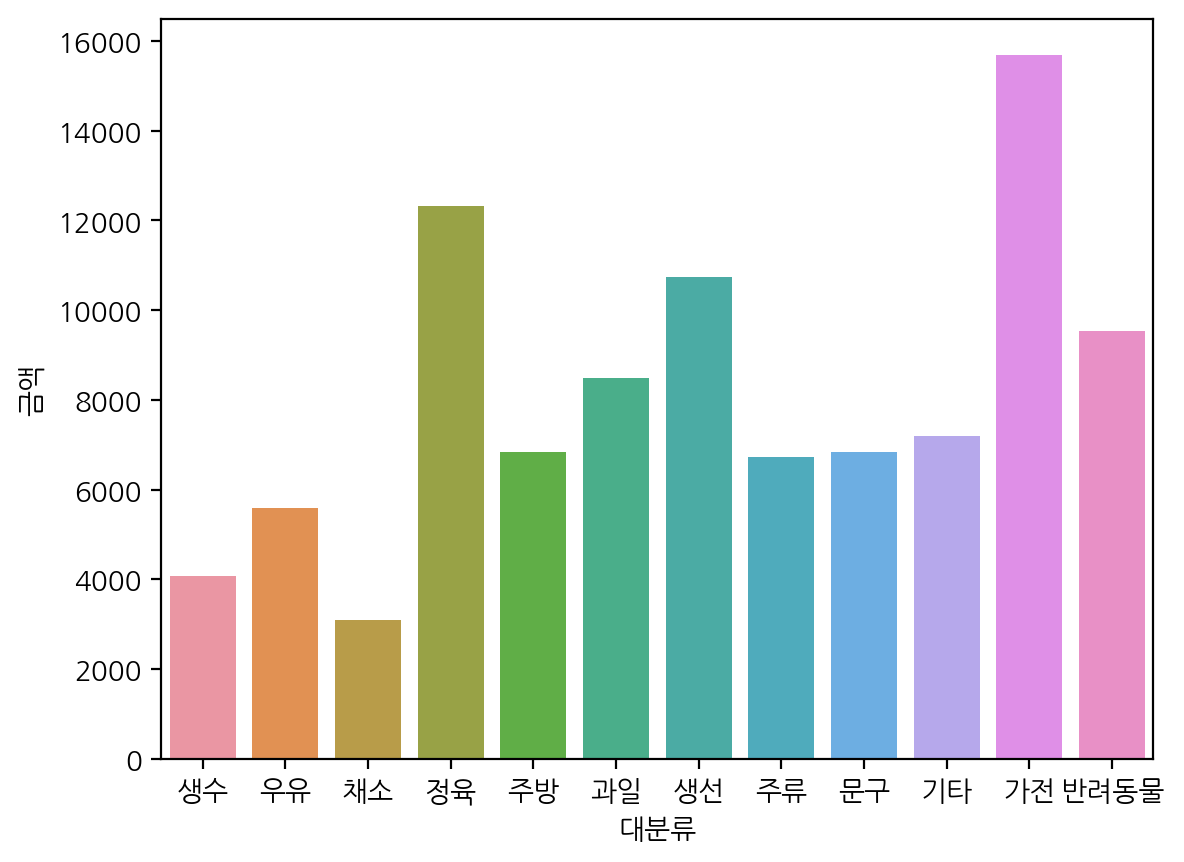

In [519]:
sns.barplot(data=min_month[min_month["대분류"].isin(large_category)], x="대분류", y="금액", ci=None, order=large_category)

<AxesSubplot:xlabel='대분류', ylabel='금액'>

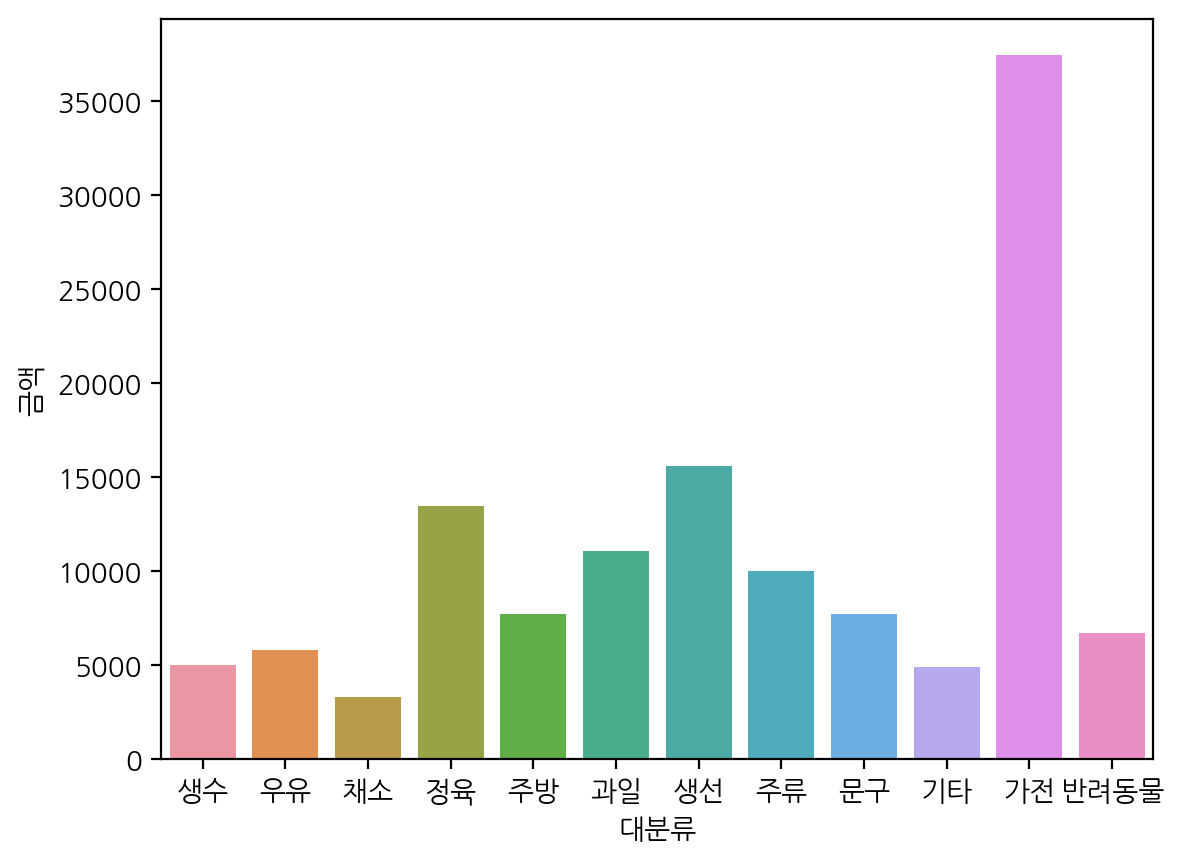

In [520]:
sns.barplot(data=many_month[many_month["대분류"].isin(large_category)], x="대분류", y="금액", ci=None, order=large_category)

In [531]:
many_month.loc[many_month["대분류"] == "가전", ["상품명", "금액"]].groupby("상품명").agg(["sum", "count"])

금액      
                       sum count
상품명                             
"Maria 균일가_1,000원"    1000     1
"Maria 균일가_3,000원"    9000     2
"구르메9,000원균일가"       18000     1
"클리어2P(직)1,350ml"    10300     1
(G)20N파인애플모양실         3000     1
...                    ...   ...
한일 라인매트 PK            8900     1
한입파인애플 90g*5입         6000     1
허니순살닭강정              76000     6
혜강 SM-5500          149000     1
흔한남매 유니콘 슬라          27000     1

[304 rows x 2 columns]

In [534]:
df.loc[df["상품명"] == "허니순살닭강정", ["대분류", "마스터카테고리이름"]]

,대분류,마스터카테고리이름
20751,가전,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름
23943,가전,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름
24806,가전,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름
31488,가전,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름
31722,가전,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름
37743,가전,가전->휴대폰 · 스마트폰 · 악세서리->휴대폰케이스 · 필름


<AxesSubplot:xlabel='대분류', ylabel='금액'>

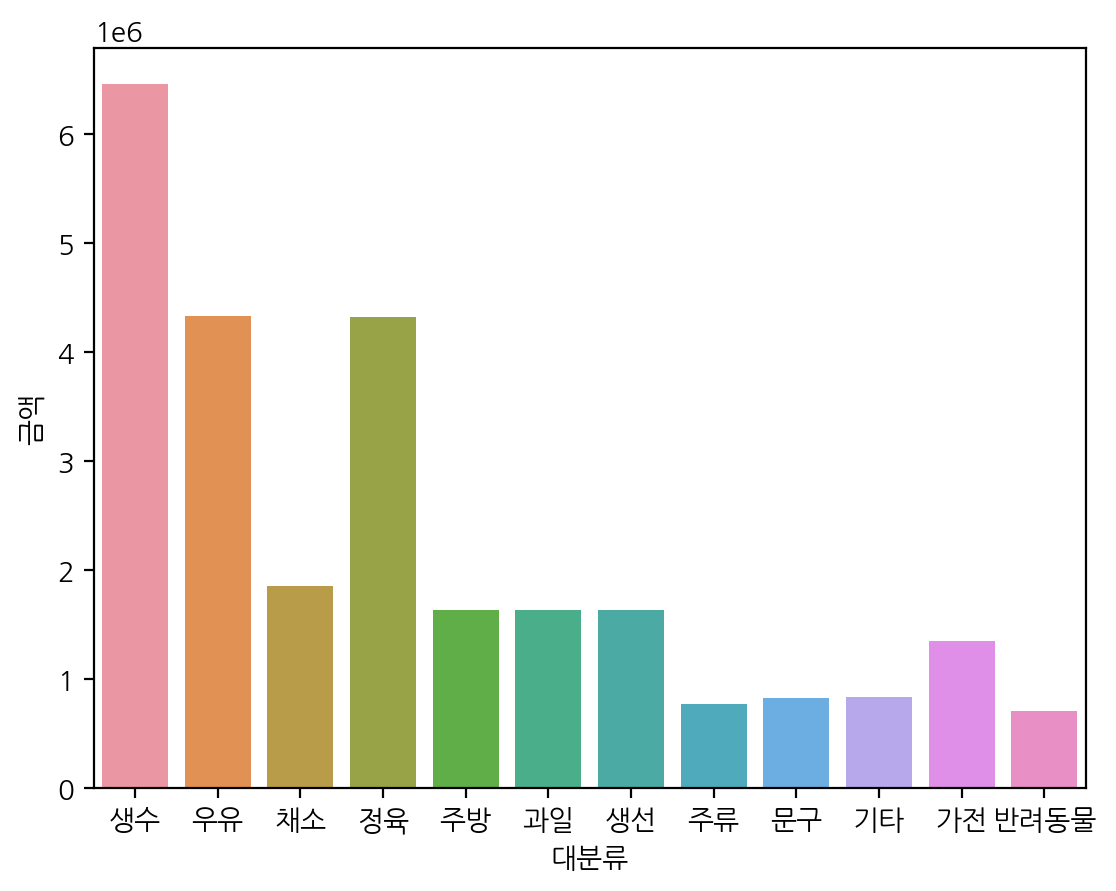

In [523]:
sns.barplot(data=min_month[min_month["대분류"].isin(large_category)], x="대분류", y="금액", estimator=sum , ci=None, order=large_category)

<AxesSubplot:xlabel='대분류', ylabel='금액'>

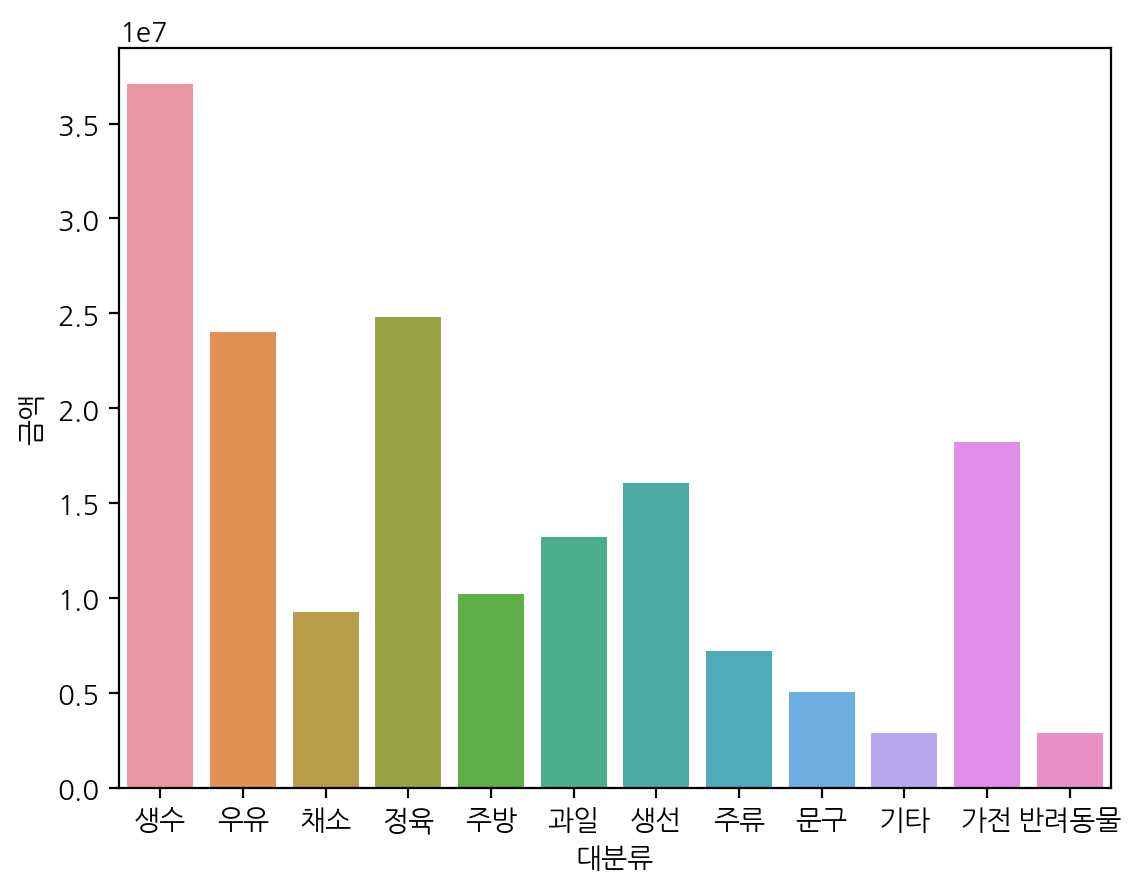

In [524]:
sns.barplot(data=many_month[many_month["대분류"].isin(large_category)], x="대분류", y="금액", estimator=sum, ci=None, order=large_category)

In [536]:
df.to_csv("purchase.csv", index=False)

In [537]:
pd.read_csv("purchase.csv")

C:\Users\chjy1\AppData\Local\Temp\ipykernel_21472\194019981.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("purchase.csv")


,구매건별ID,주문번호,사용자ID,구매날짜,구매주차,리테일러,상품코드,상품명,구매갯수,상품개당가격,연령대,성별,마스터상품번호,마스터상품명,마스터카테고리코드,마스터카테고리이름,금액,구매연월,대분류
0,95717,3475eb780c3eeac686a75a00b6b46257,d41d8cd98f00b204e9800998ecf8427e,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,60,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,12400,2019-01,문구
1,95718,3475eb780c3eeac686a75a00b6b46257,981ac26310e4d1ab74ae250b71fb1bbe,2019-01-18,20190103,A,2019011861178490,우리가 보낸 가장 긴 밤,1,12400,30,M,2019011861178490,우리가 보낸 가장 긴 밤,C001002700080009,문구 · 취미 · 자동차용품->도서 · 퍼즐->시 · 에세이,12400,2019-01,문구
2,95719,fba423b18a74d4aeaf1e69356bd10bd7,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,8809486799871,바나밸리 바나나,1,3000,30,M,8809486799871,바나밸리 바나나,C001001300080001,과일->바나나 · 파인애플->바나나,3000,2019-09,과일
3,95720,406b8f0a04b420cff9c1002ea17d1480,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,1500000033750,왕자두6입/팩,1,7000,30,M,1500000033750,왕자두6입/팩,C001001300150005,과일->포도 · 수입포도 · 복숭아 · 자두 · 살구->자두,7000,2019-09,과일
4,95721,3d9f53a8fd04e7b8b38fac156e9eefb0,981ac26310e4d1ab74ae250b71fb1bbe,2019-09-16,20190138,C,2500000049910,(A)당찬사과4-11입/봉,1,9000,30,M,2500000049910,당찬사과4-11입/봉,C001001300010001,과일->사과 · 배->사과,9000,2019-09,과일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39606,319298,5613b565360ad4b9852e3871f9c0c62a,63e631e9cf335fce6b548b845fe0cea7,2020-07-23,20200130,C,8801155738587,아기치즈 2단계 850g,1,17000,40,M,8801155738587,아기치즈 2단계 850g,C001001600100002,우유 · 냉장냉동 · 간편식->치즈 · 버터 · 디저트->자연 · 피자치즈,17000,2020-07,우유
39607,319299,bbc327613f7ad6d9b9faafa4e3117516,63e631e9cf335fce6b548b845fe0cea7,2020-07-15,20200129,C,1205180222554,1등급이상도드람앞다,1,22300,40,M,1205180222554,1등급이상도드람앞다,C001002700080001,문구 · 취미 · 자동차용품->도서 · 퍼즐->아동서적,22300,2020-07,문구
39608,319328,a7eb4ce2e0baf052303a62d8774eccb2,d15d1e2a1a19a48c63809b2b0384110c,2020-10-04,20200140,A,8802946887330,스노우매직 70g 3개입,1,7000,30,F,8802946887330,스노우매직,C001002700010009,문구 · 취미 · 자동차용품->미술용품->점토찰흙,7000,2020-10,문구
39609,319329,d8895233006e6e8f1ee5ebbb3b5d7728,d15d1e2a1a19a48c63809b2b0384110c,2020-10-04,20200140,A,8809319273547,예림아이 라인프렌즈미니108 케이크 만들기,1,5000,30,F,8809319273547,예림아이 라인프렌즈미니108 케이크 만들기,C001001700110003,생수 · 과자 · 라면 · 커피->빵 · 베이커리 · 잼류->까페 베이커리,5000,2020-10,생수
